# Project 1: Driving Licenses, Traffic Accidents and Casualties Analysis

## Problem Statment

minimize traffic accidents is a dream?
we try to find the reason for a traffic accident by analysis of this data. 

## Executive Summary
the main objective is finding the most regions that traffic accident occurs and witch year, also the number of driving licenses issued in each year.
### method used 
I useed Data viualization to show the result of analysis.
### technologies
- python
- jupyter
- pandas 
- numpy 
- seaborn
- matplotlib



### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here, including any Jupyter magic commands*

In [1]:
#Imports
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats 
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


## Data Import and Cleaning

#### 1. Read In Driving Licenses & Traffic Accidents Data
Read in the `saudi-arabia-traffic-accidents-2008.csv` and `saudi-arabia-driving-licenses-2004-2008.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#load traffic and licenses data 
traffic_data= pd.read_csv('..\data\saudi-arabia-traffic-accidents-2008.csv ',sep=';')
driving_licenses_data=pd.read_csv('..\data\saudi-arabia-driving-licenses-2004-2008.csv',sep=';')

#### 2. Display data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#first 10th rows of traffic data 
traffic_data.head(10)

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
0,0,0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,1,1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,2,2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,3,3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,4,4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"
5,5,5,(2016),Northern Boarder,No. of Casualties - Dead,193n,"30.197074783, 41.8171186952"
6,6,6,(2017),Jazan,No. of Accidents,22161n,"17.2072313962, 42.6525807422"
7,7,7,(2017),Al-Jouf,No. of Accidents,10469n,"29.9677445762, 39.5570371172"
8,8,8,(2017),Total,No. of Casualties - Dead,7489n,NaN
9,9,9,(2016),Northern Boarder,No. of Casualties - Injured,631n,"30.197074783, 41.8171186952"


In [4]:
traffic_data.shape

(84, 7)

In [5]:
driving_licenses_data.head(10)


,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
0,0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"
5,5,(2008),Makkah,77013n,"21.628962766, 41.2636898334"
6,6,(2014),Madinah,31447n,"24.927534539, 39.4918237173"
7,7,(2013),Madinah,28513n,"24.927534539, 39.4918237173"
8,8,(2012),Madinah,14459n,"24.927534539, 39.4918237173"
9,9,(1994),Madinah,3767n,"24.927534539, 39.4918237173"


In [6]:
driving_licenses_data.shape

(350, 5)

#### 3. Briefly describe the data

Take your time looking through the data and briefly describe the data in the markdown cell below. Note things about what the columns might mean, and the general information that is conveyed in the dataframe.

Answer:
tow dataset that contains the traffic accidents number by the region in Saudi Arabia from 2016 to 2017. In addition to driving licenses dataset which contains driving licenses issued by the region in Saudi Arabia from 1993 to 2017. These datasets include information such as the number of deaths and injuries by accidents.

#### 4a. How complete is the data?

Investigate missing values etc.

In [7]:
#as info() function showa there's some value missing in geo_point_2d columns of traffic dataset 
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
Unnamed: 0      84 non-null int64
Unnamed: 0.1    84 non-null int64
Year            84 non-null object
Region          84 non-null object
Indicator       84 non-null object
Value           84 non-null object
geo_point_2d    78 non-null object
dtypes: int64(2), object(5)
memory usage: 4.7+ KB


In [8]:
#also here in driving_licenses dataset there's missing values that is located at geo_point columns.
driving_licenses_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
Unnamed: 0             350 non-null int64
Year                   350 non-null object
Administritive Area    350 non-null object
Driving Liceses        350 non-null object
geo_point_2d           325 non-null object
dtypes: int64(1), object(4)
memory usage: 13.8+ KB


#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each dataset? What is the maximum *possible* value?**

In [9]:
# here in traffic data we can see the value of min=0 and max= 83. there's also highe probablity of outliers. 
traffic_data.describe()

,Unnamed: 0,Unnamed: 0.1
count,84.000000,84.000000
mean,41.500000,41.500000
std,24.392622,24.392622
min,0.000000,0.000000
25%,20.750000,20.750000
50%,41.500000,41.500000
75%,62.250000,62.250000
max,83.000000,83.000000


In [10]:
# the min value = 0, max=349. so there's also high probablity of outliers.
driving_licenses_data.describe()

,Unnamed: 0
count,350.000000
mean,174.500000
std,101.180532
min,0.000000
25%,87.250000
50%,174.500000
75%,261.750000
max,349.000000


#### 5. What are your data types? 
Display the data types of each feature. 

In [11]:
#the data types here are tow int64 and object for the rest
traffic_data.dtypes

Unnamed: 0       int64
Unnamed: 0.1     int64
Year            object
Region          object
Indicator       object
Value           object
geo_point_2d    object
dtype: object

In [12]:
# also here all the columns are objects except one column.
driving_licenses_data.dtypes

Unnamed: 0              int64
Year                   object
Administritive Area    object
Driving Liceses        object
geo_point_2d           object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: 
some columns shuld be a numric type 

#### 6. Fix incorrect data types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert numerical columns to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [13]:
# fix traffic data, remove an opropprat charachter 

In [14]:
traffic_data['Year']=traffic_data['Year'].apply(lambda x:x.replace(',',''))

In [15]:
traffic_data['Year']=traffic_data['Year'].apply(lambda x:x.replace(')',''))

In [16]:
traffic_data['Year']=traffic_data['Year'].apply(lambda x:x.replace('(',''))

In [17]:
traffic_data['Year'].head(2)

0    2016
1    2016
Name: Year, dtype: object

In [18]:
# fix driving licenses, remove an opropprat charachter 

In [19]:
driving_licenses_data['Year']=driving_licenses_data['Year'].apply(lambda x:x.replace(',',''))

In [20]:
driving_licenses_data['Year']=driving_licenses_data['Year'].apply(lambda x:x.replace(')',''))

In [21]:
driving_licenses_data['Year']=driving_licenses_data['Year'].apply(lambda x:x.replace('(',''))

In [22]:
driving_licenses_data.head(2)

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
0,0,2012,Makkah,143954n,"21.628962766, 41.2636898334"
1,1,1994,Makkah,75349n,"21.628962766, 41.2636898334"


In [23]:
#change Year column to numeric type
traffic_data['Year'] = pd.to_numeric(traffic_data['Year'])
traffic_data['Year'].head()

0    2016
1    2016
2    2016
3    2016
4    2016
Name: Year, dtype: int64

In [24]:
#change Year column to numeric type
driving_licenses_data['Year'] = pd.to_numeric(driving_licenses_data['Year'])
driving_licenses_data['Year'].head()

0    2012
1    1994
2    1998
3    2004
4    2005
Name: Year, dtype: int64

- Make new columns `x` and `y` using `geo_point_2d`

In [25]:
#make x,y columns to traffic data 

In [26]:
#first creat mask to isolate nullvalue 
traffic_data_mask=traffic_data['geo_point_2d'].notnull()
#split geo_point_2d column, and creat x column then fit index 0 into x column
traffic_data['x']= traffic_data[traffic_data_mask]['geo_point_2d'].apply(lambda x:x.split(',')[0])

In [27]:
#split geo_point_2d column, and creat y column then fit index into y column 
traffic_data['y']= traffic_data[traffic_data_mask]['geo_point_2d'].apply(lambda x:x.split(',')[1])

In [28]:
traffic_data.head(2)

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d,x,y
0,0,0,2016,Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,1,1,2016,Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439",23.2883307307,50.1478302439


In [29]:
#make x,y columns to driving_licenses data 

In [30]:
#first creat mask to isolate nullvalue
driving_licenses_data_mask=driving_licenses_data['geo_point_2d'].notnull()
#split geo_point_2d column, and creat x column then fit index 0 into x column
driving_licenses_data['x']= driving_licenses_data[driving_licenses_data_mask]['geo_point_2d'].apply(lambda x:x.split(',')[0])

In [31]:
#split geo_point_2d column, and creat y column then fit index into y column 
driving_licenses_data['y']= driving_licenses_data[driving_licenses_data_mask]['geo_point_2d'].apply(lambda x:x.split(',')[1])

In [32]:
driving_licenses_data.head(2)

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d,x,y
0,0,2012,Makkah,143954n,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,1,1994,Makkah,75349n,"21.628962766, 41.2636898334",21.628962766,41.2636898334


- Fix any individual values preventing other columns from being the appropriate type.

In [33]:
#remove n from valu column to convert it into int 
traffic_data['Value']= traffic_data['Value'].apply(lambda x: x.replace('n',''))
traffic_data['Value']= traffic_data['Value'].apply(lambda x: np.array(x,dtype=int))

In [34]:
traffic_data['x']= traffic_data['x'].apply(lambda x: np.array(x,dtype=float))

In [35]:
traffic_data['y']= traffic_data['y'].apply(lambda x: np.array(x,dtype=float))

In [36]:
traffic_data.head(2)

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d,x,y
0,0,0,2016,Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334",21.628963,41.26369
1,1,1,2016,Eastern Region,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439",23.288331,50.14783


In [37]:
#remove n from driving liceses column to convert it into int 
driving_licenses_data['Driving Liceses']= driving_licenses_data['Driving Liceses'].apply(lambda x: np.array(x.replace('n',''),dtype=int))

In [38]:
driving_licenses_data['x']= driving_licenses_data['x'].apply(lambda x: np.array(x,dtype=float))

In [39]:
driving_licenses_data['y']= driving_licenses_data['y'].apply(lambda x: np.array(x,dtype=float))

In [40]:
driving_licenses_data.head(2)

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d,x,y
0,0,2012,Makkah,143954,"21.628962766, 41.2636898334",21.628963,41.26369
1,1,1994,Makkah,75349,"21.628962766, 41.2636898334",21.628963,41.26369


- Finish your data modifications by making sure the columns are now typed appropriately.

In [41]:
#code
driving_licenses_data.head(5)

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d,x,y
0,0,2012,Makkah,143954,"21.628962766, 41.2636898334",21.628963,41.26369
1,1,1994,Makkah,75349,"21.628962766, 41.2636898334",21.628963,41.26369
2,2,1998,Makkah,86082,"21.628962766, 41.2636898334",21.628963,41.26369
3,3,2004,Makkah,86636,"21.628962766, 41.2636898334",21.628963,41.26369
4,4,2005,Makkah,65099,"21.628962766, 41.2636898334",21.628963,41.26369


In [42]:
traffic_data.head(5)

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d,x,y
0,0,0,2016,Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334",21.628963,41.263690
1,1,1,2016,Eastern Region,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439",23.288331,50.147830
2,2,2,2016,Tabouk,No. of Casualties - Dead,434,"27.90165499, 37.2598581394",27.901655,37.259858
3,3,3,2016,Hail,No. of Casualties - Dead,299,"27.400845724, 41.4406960508",27.400846,41.440696
4,4,4,2016,Hail,No. of Accidents,10199,"27.400845724, 41.4406960508",27.400846,41.440696


- Display the data types again to confirm they are correct.

In [43]:
#Code:
traffic_data.dtypes

Unnamed: 0        int64
Unnamed: 0.1      int64
Year              int64
Region           object
Indicator        object
Value             int64
geo_point_2d     object
x               float64
y               float64
dtype: object

In [44]:
driving_licenses_data.dtypes

Unnamed: 0               int64
Year                     int64
Administritive Area     object
Driving Liceses          int64
geo_point_2d            object
x                      float64
y                      float64
dtype: object

#### 7. Rename columns
Change the names of the columns to more expressive names so that you can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these two datasets, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).
- Please also fix any typos you see in the column names.

In [45]:
#code

traffic_data.columns=['index','del','year','region','indicator','value','geo_point_2d','x','y']

In [46]:
traffic_data.head(2)

,index,del,year,region,indicator,value,geo_point_2d,x,y
0,0,0,2016,Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334",21.628963,41.26369
1,1,1,2016,Eastern Region,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439",23.288331,50.14783


In [47]:
driving_licenses_data.columns=['index','year','region','driving_liceses','geo_point_2d','x','y']

In [48]:
driving_licenses_data.head(2)

,index,year,region,driving_liceses,geo_point_2d,x,y
0,0,2012,Makkah,143954,"21.628962766, 41.2636898334",21.628963,41.26369
1,1,1994,Makkah,75349,"21.628962766, 41.2636898334",21.628963,41.26369


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---| 
|Year|int|Driving_Licenses/Traffic_Accidents|shows the year of issued licenses/Accidents|
|Region|object|Traffic_Accidents|shows in witch region Accidents accurce| 
|Administritive Area|object|Driving_Licenses|shows in witch region issued licenses prduce |
|Indicator|object|Traffic_Accidents|status of accident|
|Value|int|Traffic_Accidents|shows how much Accidents accurs|
|x|int|Driving_Licenses/Traffic_Accidents|location of issued licenses/Accidents | 
|y|int|Driving_Licenses/Traffic_Accidents|location of issued licenses/Accidents |
|Driving Liceses|int|Driving_Licenses/Traffic_Accidents|shows how much Driving Liceses preduce| 


#### 9. Drop unnecessary rows

This study concerns accident and license in regions/area. Please do the followings:
0. Which rows are not associated with regions?
1. Confirm the numbers of all regions add up to total.
2. Remove the rows that are not associated with regions

In [49]:
#here we can see total row is not associated with regions in traffic data.
traffic_data['region'].value_counts()

Total               6
Riyadh              6
Najran              6
Tabouk              6
Northern Boarder    6
Eastern Region      6
Jazan               6
Hail                6
Madinah             6
Qassim              6
Makkah              6
Al-Jouf             6
Asir                6
Al-Baaha            6
Name: region, dtype: int64

In [50]:
#here we can see also total row is not associated with regions in driving licenses.
driving_licenses_data['region'].value_counts()

Riyadh              25
Jazan               25
Madinah             25
Assir               25
Al-Jouf             25
Al-Baha             25
Eastern             25
Total               25
Al-Qaseem           25
Tabouk              25
Northern Boarder    25
Najran              25
Hail                25
Makkah              25
Name: region, dtype: int64

In [51]:
traffic_data['region']=traffic_data['region'].replace('Qassim','Al-Qaseem')

In [52]:
traffic_data['region']=traffic_data['region'].replace('Eastern Region','Eastern')

In [53]:
traffic_data['region']=traffic_data['region'].replace('Asir','Assir')

In [54]:
traffic_data['region']=traffic_data['region'].replace('Al-Baaha','Al-Baha')

In [55]:
driving_licenses_data=driving_licenses_data.drop((driving_licenses_data[driving_licenses_data['region']=='Total']).index)

In [56]:
driving_licenses_data.head(2)

,index,year,region,driving_liceses,geo_point_2d,x,y
0,0,2012,Makkah,143954,"21.628962766, 41.2636898334",21.628963,41.26369
1,1,1994,Makkah,75349,"21.628962766, 41.2636898334",21.628963,41.26369


In [57]:
traffic_data=traffic_data.drop((traffic_data[traffic_data['region']=='Total']).index)

In [58]:
traffic_data.head(2)

,index,del,year,region,indicator,value,geo_point_2d,x,y
0,0,0,2016,Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334",21.628963,41.26369
1,1,1,2016,Eastern,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439",23.288331,50.14783


#### 10a. Data formats
Is the License data in long or wide format? How about the Accident data? And why?

In [59]:
#License data its wide.
driving_licenses_data.shape
 

(325, 7)

In [60]:
#its long data 
traffic_data.shape

(78, 9)

In [61]:
driving_licenses_data.isnull().sum()

index              0
year               0
region             0
driving_liceses    0
geo_point_2d       0
x                  0
y                  0
dtype: int64

In [62]:
traffic_data.isnull().sum()

index           0
del             0
year            0
region          0
indicator       0
value           0
geo_point_2d    0
x               0
y               0
dtype: int64

#### 10b. Changing formats
Which format would work best for both dataframes? Transform the datasets to the same format before merging in the next task.

In [63]:
pd.pivot_table(traffic_data,index='year',columns='region',values=['value','x','y','indicator'])

value                                                   \
region      Al-Baha      Al-Jouf    Al-Qaseem         Assir  Eastern   
year                                                                   
2016    1676.666667  3792.333333  9191.333333  12069.333333  35875.0   
2017     851.666667  3857.000000  8056.666667   9480.333333  28823.0   

                                                                          ...  \
region         Hail        Jazan      Madinah        Makkah       Najran  ...   
year                                                                      ...   
2016    3810.000000  9548.666667  6493.666667  49821.333333  1371.333333  ...   
2017    3472.333333  8278.000000  6522.333333  52601.666667  1384.333333  ...   

               y                                                       \
region     Assir   Eastern       Hail      Jazan    Madinah    Makkah   
year                                                                    
2016    42.94147  50.14783  41.440696  42.652581  39.491824  41.26369   
2017    42.94147  50.14783  41.440696  42.652581  39.491824  41.26369   

                                                         
region    Najran Northern Boarder     Riyadh     Tabouk  
year                                                     
2016    46.86885        41.817119  45.585751  37.259858  
2017    46.86885        41.817119  45.585751  37.259858  

[2 rows x 39 columns]

In [64]:
pd.pivot_table(driving_licenses_data,index='year',columns='region',values=['x','y','driving_liceses'])

driving_liceses                                                         \
region         Al-Baha Al-Jouf Al-Qaseem  Assir Eastern   Hail  Jazan Madinah   
year                                                                            
1993              3270    2884     73618   6226    9964  10484   6009    4122   
1994              2729    2535     68916   5185   10918  11131   3826    3767   
1995              2423    2270     49690   4889    7831   9735   2284    4155   
1996              1468    2518     42693   3319    8461  10267   2226    3425   
1997              3027    3565     10092  12204   58814   6606   5695   10495   
1998              5110    3476     11350  13220   70650   4708   2613   13020   
1999              4246    3950      9983  14625   64973   3139   4792   11108   
2000              4832    4666     12226  18622   65767   3215   5678    9562   
2001              7594    4756     14718  20321   74119   6077  10631   13561   
2002              3335    5940     16298  20417   85035   5070   5254   10494   
2003              3616    3852     10666  15693   82697   3861   5220   12920   
2004              3410    4601      9390  17947   84984   8656   5016   10556   
2005              2698    3558     10480  18565   82505  16247   5502   10210   
2006              3593    4846     12142  20330   79517   8166   7955   11204   
2007               997    9097     25174  10835  106511   4021  12634   12174   
2008              5418   10929     22236  18800  104626   7413  11346    9194   
2009              9815   10567     27571  21582  108544   7282   9437   11574   
2010              7076   10937     36737  21835  110295   7637  12270   15045   
2011              6450   10180     10760  24515  151087   9123  10946   14630   
2012              7593   10246     11421  23136  129971  11082  11156   14459   
2013              7482   11602     17889  29730  123325   9731  14175   28513   
2014              7268    9982     29113  29552  121774  10417  15621   31447   
2015              4856   10233     13631  38567  135752   7172  13931   22744   
2016              4614    9371      9180  41367  142307  54507  11504   24540   
2017              4131    8091      6318  39133  126816  22035  18345   36165   

                       ...         y                                  \
region  Makkah Najran  ...     Assir   Eastern       Hail      Jazan   
year                   ...                                             
1993     65977   3769  ...  42.94147  50.14783  41.440696  42.652581   
1994     75349   3880  ...  42.94147  50.14783  41.440696  42.652581   
1995     60356   3268  ...  42.94147  50.14783  41.440696  42.652581   
1996     46195   3274  ...  42.94147  50.14783  41.440696  42.652581   
1997     76623   3073  ...  42.94147  50.14783  41.440696  42.652581   
1998     86082   4322  ...  42.94147  50.14783  41.440696  42.652581   
1999    103535   3959  ...  42.94147  50.14783  41.440696  42.652581   
2000     87053   4905  ...  42.94147  50.14783  41.440696  42.652581   
2001     85593   4950  ...  42.94147  50.14783  41.440696  42.652581   
2002     88593   5117  ...  42.94147  50.14783  41.440696  42.652581   
2003     74236   4443  ...  42.94147  50.14783  41.440696  42.652581   
2004     86636   4609  ...  42.94147  50.14783  41.440696  42.652581   
2005     65099   4779  ...  42.94147  50.14783  41.440696  42.652581   
2006     66967   5897  ...  42.94147  50.14783  41.440696  42.652581   
2007     91902   7226  ...  42.94147  50.14783  41.440696  42.652581   
2008     77013   7938  ...  42.94147  50.14783  41.440696  42.652581   
2009    112045   6771  ...  42.94147  50.14783  41.440696  42.652581   
2010    113531   6360  ...  42.94147  50.14783  41.440696  42.652581   
2011    110647   7314  ...  42.94147  50.14783  41.440696  42.652581   
2012    143954   9201  ...  42.94147  50.14783  41.440696  42.652581   
2013    131108   8996  ...  42.94147  50.14783  41.440696  42.652581   
2014    14

In [65]:
new_driving_licenses_data=pd.pivot_table(driving_licenses_data,index=['year','region'],values=['x','y','driving_liceses'])

In [66]:
pd.pivot_table(driving_licenses_data,index=['year','region'],values=['x','y','driving_liceses'])

driving_liceses          x          y
year region                                                 
1993 Al-Baha                      3270  20.148406  41.466548
     Al-Jouf                      2884  29.967745  39.557037
     Al-Qaseem                   73618  26.196706  43.343000
     Assir                        6226  19.138785  42.941470
     Eastern                      9964  23.288331  50.147830
     Hail                        10484  27.400846  41.440696
     Jazan                        6009  17.207231  42.652581
     Madinah                      4122  24.927535  39.491824
     Makkah                      65977  21.628963  41.263690
     Najran                       3769  18.451100  46.868850
     Northern Boarder             1510  30.197075  41.817119
     Riyadh                     103886  23.081434  45.585751
     Tabouk                       3174  27.901655  37.259858
1994 Al-Baha                      2729  20.148406  41.466548
     Al-Jouf                      2535  29.967745  39.557037
     Al-Qaseem                   68916  26.196706  43.343000
     Assir                        5185  19.138785  42.941470
     Eastern                     10918  23.288331  50.147830
     Hail                        11131  27.400846  41.440696
     Jazan                        3826  17.207231  42.652581
     Madinah                      3767  24.927535  39.491824
     Makkah                      75349  21.628963  41.263690
     Najran                       3880  18.451100  46.868850
     Northern Boarder             1457  30.197075  41.817119
     Riyadh                     110545  23.081434  45.585751
     Tabouk                       3282  27.901655  37.259858
1995 Al-Baha                      2423  20.148406  41.466548
     Al-Jouf                      2270  29.967745  39.557037
     Al-Qaseem                   49690  26.196706  43.343000
     Assir                        4889  19.138785  42.941470
...                                ...        ...        ...
2015 Najran                       1864  18.451100  46.868850
     Northern Boarder             3837  30.197075  41.817119
     Riyadh                      24548  23.081434  45.585751
     Tabouk                        915  27.901655  37.259858
2016 Al-Baha                      4614  20.148406  41.466548
     Al-Jouf                      9371  29.967745  39.557037
     Al-Qaseem                    9180  26.196706  43.343000
     Assir                       41367  19.138785  42.941470
     Eastern                    142307  23.288331  50.147830
     Hail                        54507  27.400846  41.440696
     Jazan                       11504  17.207231  42.652581
     Madinah                     24540  24.927535  39.491824
     Makkah                     136055  21.628963  41.263690
     Najran                       2153  18.451100  46.868850
     Northern Boarder             4958  30.197075  41.817119
     Riyadh                     242851  23.081434  45.585751
     Tabouk                      13610  27.901655  37.259858
2017 Al-Baha                      4131  20.148406  41.466548
     Al-Jouf                      8091  29.967745  39.557037
     Al-Qaseem                    6318  26.196706  43.343000
     Assir                       39133  19.138785  42.941470
     Eastern                    126816  23.288331  50.147830
     Hail                        22035  27.400846  41.440696
     Jazan                       18345  17.207231  42.652581
     Madinah                     36165  24.927535  39.491824
     Makkah                     142487  21.628963  41.263690
     Najran                      13825  18.451100  46.868850
     Northern Boarder             5280  30.197075  41.817119
     Riyadh                     495307  23.081434  45.585751
     Tabouk                      10232  27.901655  37.259858

[325 rows x 3 columns]

In [67]:
new_traffic_data=pd.pivot_table(traffic_data,index=['year','region'],columns='indicator',values=['value'])


In [68]:
pd.pivot_table(traffic_data,index=['year','region'],columns='indicator',values=['value'])

value                           \
indicator             No. of Accidents No. of Casualties - Dead   
year region                                                       
2016 Al-Baha                      3618                      185   
     Al-Jouf                     10212                      245   
     Al-Qaseem                   25664                      397   
     Assir                       32684                      983   
     Eastern                    101619                     1113   
     Hail                        10199                      299   
     Jazan                       25873                      514   
     Madinah                     14475                      822   
     Makkah                     134838                     2243   
     Najran                       3235                      173   
     Northern Boarder            13196                      193   
     Riyadh                     141736                     1430   
     Tabouk                      16031                      434   
2017 Al-Baha                      1414                      134   
     Al-Jouf                     10469                      240   
     Al-Qaseem                   22405                      319   
     Assir                       25245                      828   
     Eastern                     81433                      963   
     Hail                         9379                      265   
     Jazan                       22161                      466   
     Madinah                     16070                      580   
     Makkah                     145541                     1641   
     Najran                       3193                      194   
     Northern Boarder            11540                      112   
     Riyadh                      99925                     1399   
     Tabouk                      11713                      348   

                                                   
indicator             No. of Casualties - Injured  
year region                                        
2016 Al-Baha                                 1227  
     Al-Jouf                                  920  
     Al-Qaseem                               1513  
     Assir                                   2541  
     Eastern                                 4893  
     Hail                                     932  
     Jazan                                   2259  
     Madinah                                 4184  
     Makkah                                 12383  
     Najran                                   706  
     Northern Boarder                         631  
     Riyadh                                  4207  
     Tabouk                                  1724  
2017 Al-Baha                                 1007  
     Al-Jouf                                  862  
     Al-Qaseem                               1446  
     Assir                                   2368  
     Eastern                                 4073  
     Hail                                     773  
     Jazan                                   2207  
     Madinah                                 2917  
     Makkah                                 10623  
     Najran                                   766  
     Northern Boarder                         374  
     Riyadh                                  4540  
     Tabouk                                  1243

In [69]:
new_traffic_data.shape

(26, 3)

In [70]:
new_driving_licenses_data.shape

(325, 3)

#### 11. Merge dataframes

Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key. Assign this to a new variable. Which join should you use to preserve the most data?

In [71]:
#code
combined_datasets=pd.merge(new_traffic_data, new_driving_licenses_data,how='outer' ,on=['year','region'])
#df3 = pd.concat([new_traffic_data, new_driving_licenses_data],sort=False)

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [72]:
combined_datasets

(value, No. of Accidents)  \
year region                                        
2016 Al-Baha                              3618.0   
     Al-Jouf                             10212.0   
     Al-Qaseem                           25664.0   
     Assir                               32684.0   
     Eastern                            101619.0   
     Hail                                10199.0   
     Jazan                               25873.0   
     Madinah                             14475.0   
     Makkah                             134838.0   
     Najran                               3235.0   
     Northern Boarder                    13196.0   
     Riyadh                             141736.0   
     Tabouk                              16031.0   
2017 Al-Baha                              1414.0   
     Al-Jouf                             10469.0   
     Al-Qaseem                           22405.0   
     Assir                               25245.0   
     Eastern                             81433.0   
     Hail                                 9379.0   
     Jazan                               22161.0   
     Madinah                             16070.0   
     Makkah                             145541.0   
     Najran                               3193.0   
     Northern Boarder                    11540.0   
     Riyadh                              99925.0   
     Tabouk                              11713.0   
1993 Al-Baha                                 NaN   
     Al-Jouf                                 NaN   
     Al-Qaseem                               NaN   
     Assir                                   NaN   
...                                          ...   
2013 Najran                                  NaN   
     Northern Boarder                        NaN   
     Riyadh                                  NaN   
     Tabouk                                  NaN   
2014 Al-Baha                                 NaN   
     Al-Jouf                                 NaN   
     Al-Qaseem                               NaN   
     Assir                                   NaN   
     Eastern                                 NaN   
     Hail                                    NaN   
     Jazan                                   NaN   
     Madinah                                 NaN   
     Makkah                                  NaN   
     Najran                                  NaN   
     Northern Boarder                        NaN   
     Riyadh                                  NaN   
     Tabouk                                  NaN   
2015 Al-Baha                                 NaN   
     Al-Jouf                                 NaN   
     Al-Qaseem                               NaN   
     Assir                                   NaN   
     Eastern                                 NaN   
     Hail                                    NaN   
     Jazan                                   NaN   
     Madinah                                 NaN   
     Makkah                                  NaN   
     Najran                                  NaN   
     Northern Boarder                        NaN   
     Riyadh                                  NaN   
     Tabouk                                  NaN   

                       (value, No. of Casualties - Dead)  \
year region                                                
2016 Al-Baha                                       185.0   
     Al-Jouf                                       245.0   
     Al-Qaseem                                     397.0   
     Assir                                         983.0   
     Eastern                                      1113.0   
     Hail                                          299.0   
     Jazan                                         514.0   
     Madinah                                       822.0   
     Makkah                                       2243.0   
     Najran                                        173.0   
     Northern Boarder     

#### 12. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_datasets.csv`.

In [73]:
#code
combined_datasets.to_csv('combined_datasets.csv',sep=',')


## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [74]:
#Code:
combined_df= pd.read_csv('combined_datasets.csv')
combined_df=pd.DataFrame(combined_df)
combined_df.describe()

,year,"('value', 'No. of Accidents')","('value', 'No. of Casualties - Dead')","('value', 'No. of Casualties - Injured')",driving_liceses,x,y
count,325.000000,26.000000,26.000000,26.000000,325.000000,325.000000,325.000000
mean,2005.000000,38225.692308,635.384615,2743.038462,28915.347692,23.810447,42.602789
std,7.222222,46493.705035,549.783381,2922.641127,47419.058819,4.197987,3.254196
min,1993.000000,1414.000000,112.000000,374.000000,915.000000,17.207231,37.259858
25%,1999.000000,10276.250000,241.250000,923.000000,4846.000000,20.148406,41.263690
50%,2005.000000,16050.500000,415.500000,1618.500000,10267.000000,23.288331,41.817119
75%,2011.000000,30981.250000,929.250000,3784.000000,25423.000000,27.400846,43.343000
max,2017.000000,145541.000000,2243.000000,12383.000000,495307.000000,30.197075,50.147830


In [75]:
type(combined_df)

pandas.core.frame.DataFrame

In [76]:
combined_df.columns=['year','region','number_of_accidents','number_of_dead',
                     'number_of_injured','driving_licenses','x','y']

In [77]:
combined_df.head(10)

,year,region,number_of_accidents,number_of_dead,number_of_injured,driving_licenses,x,y
0,2016,Al-Baha,3618.0,185.0,1227.0,4614,20.148406,41.466548
1,2016,Al-Jouf,10212.0,245.0,920.0,9371,29.967745,39.557037
2,2016,Al-Qaseem,25664.0,397.0,1513.0,9180,26.196706,43.343000
3,2016,Assir,32684.0,983.0,2541.0,41367,19.138785,42.941470
4,2016,Eastern,101619.0,1113.0,4893.0,142307,23.288331,50.147830
5,2016,Hail,10199.0,299.0,932.0,54507,27.400846,41.440696
6,2016,Jazan,25873.0,514.0,2259.0,11504,17.207231,42.652581
7,2016,Madinah,14475.0,822.0,4184.0,24540,24.927535,39.491824
8,2016,Makkah,134838.0,2243.0,12383.0,136055,21.628963,41.263690
9,2016,Najran,3235.0,173.0,706.0,2153,18.451100,46.868850


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [78]:
#codefrom math import sqrtstd = sqrt(mean(abs(x - x.mean())**2))

import math
def stdev(column):
    column = column[column.notnull()]
    std = 0
    for val in column:
        std += ((val - column.mean())**2)
        std /= column.count()
    return math.sqrt(std) 

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'Driving_Licenses_x': 120, 'Traffic_Accidents_x': 120, ...}`

In [79]:
#Code:

stander={'year':stdev(combined_df['year']),'driving_licenses':stdev(combined_df['driving_licenses']),
         'number_of_accident':stdev(combined_df['number_of_accidents']),
         'number_of_dead':stdev(combined_df['number_of_dead']),
         'y':stdev(combined_df["y"]),'x':stdev(combined_df["x"])
        }

In [80]:
stander

{'year': 0.5555555555555556,
 'driving_licenses': 1553.2438873130243,
 'number_of_accident': 5719.356225237687,
 'number_of_dead': 63.68059940865749,
 'y': 0.29651458677084197,
 'x': 0.22695309663602212}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer:

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
- Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
- What are the regions that have more Driving Licenses issued in each year than the year average?
- What are the regions that have more Traffic Accidents happened in each year than the year average?

Based on what you've just observed, have you identified any regions that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [81]:
#Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)

df_A=combined_df.query('year == [1993, 2017] ')
df_A=pd.DataFrame(df_A.groupby(['region','year']).driving_licenses.sum())
df_A.sort_values('driving_licenses', axis = 0, ascending = True, 
                 inplace = True, na_position ='last')
df_A


,,driving_licenses
region,year,
Northern Boarder,1993,1510
Al-Jouf,1993,2884
Tabouk,1993,3174
Al-Baha,1993,3270
Najran,1993,3769
Madinah,1993,4122
Al-Baha,2017,4131
Northern Boarder,2017,5280
Jazan,1993,6009


In [82]:
#Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016,2017)
df_B=combined_df.query('year == [2016, 2017]')
df_B=pd.DataFrame(df_B.groupby(['region','year'])['number_of_accidents'].mean())
df_B.sort_values('number_of_accidents', axis = 0, ascending = True, 
                 inplace = True, na_position ='last')
df_B

number_of_accidents
region           year                     
Al-Baha          2017               1414.0
Najran           2017               3193.0
                 2016               3235.0
Al-Baha          2016               3618.0
Hail             2017               9379.0
                 2016              10199.0
Al-Jouf          2016              10212.0
                 2017              10469.0
Northern Boarder 2017              11540.0
Tabouk           2017              11713.0
Northern Boarder 2016              13196.0
Madinah          2016              14475.0
Tabouk           2016              16031.0
Madinah          2017              16070.0
Jazan            2017              22161.0
Al-Qaseem        2017              22405.0
Assir            2017              25245.0
Al-Qaseem        2016              25664.0
Jazan            2016              25873.0
Assir            2016              32684.0
Eastern          2017              81433.0
Riyadh           2017              99925.0
Eastern          2016             101619.0
Makkah           2016             134838.0
Riyadh           2016             141736.0
Makkah           2017             145541.0

In [83]:
#What are the regions that have more Driving Licenses issued in each year than the year average
df_c=combined_df.groupby(['region','year'])['driving_licenses'].sum()
df_d=combined_df.groupby(['year','region'])['driving_licenses'].mean()
pd.merge(df_c, df_d,how='outer' ,on=['year','region'])



,,driving_licenses_x,driving_licenses_y
year,region,,
1993,Al-Baha,3270,3270
1994,Al-Baha,2729,2729
1995,Al-Baha,2423,2423
1996,Al-Baha,1468,1468
1997,Al-Baha,3027,3027
1998,Al-Baha,5110,5110
1999,Al-Baha,4246,4246
2000,Al-Baha,4832,4832
2001,Al-Baha,7594,7594


In [84]:
#What are the regions that have more Traffic Accidents happened in each year than the year average
#np.average(driving_licenses_data['year'])
df_D=combined_df.groupby(['year','region'])['number_of_accidents'].sum()
df_E=combined_df.groupby(['year','region'])['number_of_accidents'].mean()
pd.merge(df_E, df_D,how='outer' ,on=['year','region'])



number_of_accidents_x  number_of_accidents_y
year region                                                        
1993 Al-Baha                             NaN                    0.0
     Al-Jouf                             NaN                    0.0
     Al-Qaseem                           NaN                    0.0
     Assir                               NaN                    0.0
     Eastern                             NaN                    0.0
     Hail                                NaN                    0.0
     Jazan                               NaN                    0.0
     Madinah                             NaN                    0.0
     Makkah                              NaN                    0.0
     Najran                              NaN                    0.0
     Northern Boarder                    NaN                    0.0
     Riyadh                              NaN                    0.0
     Tabouk                              NaN                    0.0
1994 Al-Baha                             NaN                    0.0
     Al-Jouf                             NaN                    0.0
     Al-Qaseem                           NaN                    0.0
     Assir                               NaN                    0.0
     Eastern                             NaN                    0.0
     Hail                                NaN                    0.0
     Jazan                               NaN                    0.0
     Madinah                             NaN                    0.0
     Makkah                              NaN                    0.0
     Najran                              NaN                    0.0
     Northern Boarder                    NaN                    0.0
     Riyadh                              NaN                    0.0
     Tabouk                              NaN                    0.0
1995 Al-Baha                             NaN                    0.0
     Al-Jouf                             NaN                    0.0
     Al-Qaseem                           NaN                    0.0
     Assir                               NaN                    0.0
...                                      ...                    ...
2015 Najran                              NaN                    0.0
     Northern Boarder                    NaN                    0.0
     Riyadh                              NaN                    0.0
     Tabouk                              NaN                    0.0
2016 Al-Baha                          3618.0                 3618.0
     Al-Jouf                         10212.0                10212.0
     Al-Qaseem                       25664.0                25664.0
     Assir                           32684.0                32684.0
     Eastern                        101619.0               101619.0
     Hail                            10199.0                10199.0
     Jazan                           25873.0                25873.0
     Madinah                         14475.0                14475.0
     Makkah                         134838.0               134838.0
     Najran                           3235.0                 3235.0
     Northern Boarder                13196.0                13196.0
     Riyadh                         141736.0               141736.0
     Tabouk                          16031.0                16031.0
2017 Al-Baha                          1414.0                 1414.0
     Al-Jouf                         10469.0                10469.0
     Al-Qaseem                       22405.0                22405.0
     Assir                           25245.0                25245.0
     Eastern                         81433.0                81433.0
     Hail                             9379.0                 9379.0
     Jazan                           22161.0                22161.0
     Madinah                         16070.0                16070.0
     Makkah                         145541.0               145541.0
     Najran

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

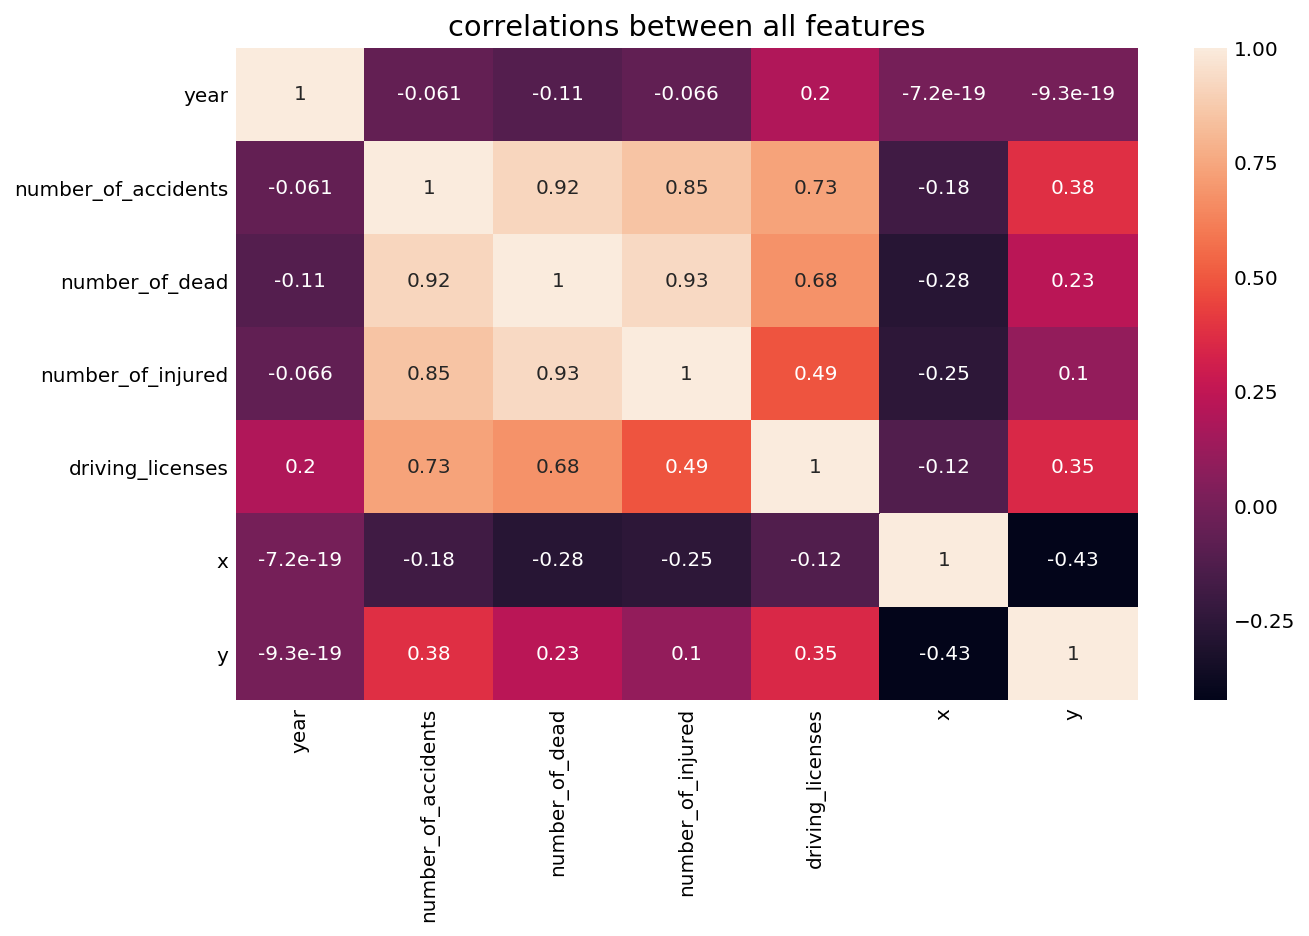

In [85]:
fig, ax = plt.subplots(figsize=(9,6))
sns.heatmap(combined_df.corr(),annot=True,ax=ax)
plt.title('correlations between all features')
plt.show()

#### Define a custom function to subplot histograms

We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [86]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
                # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Driving Licenses number
- Traffic Accidents number

Please plot two additional histograms that will help with your understanding of the data

C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


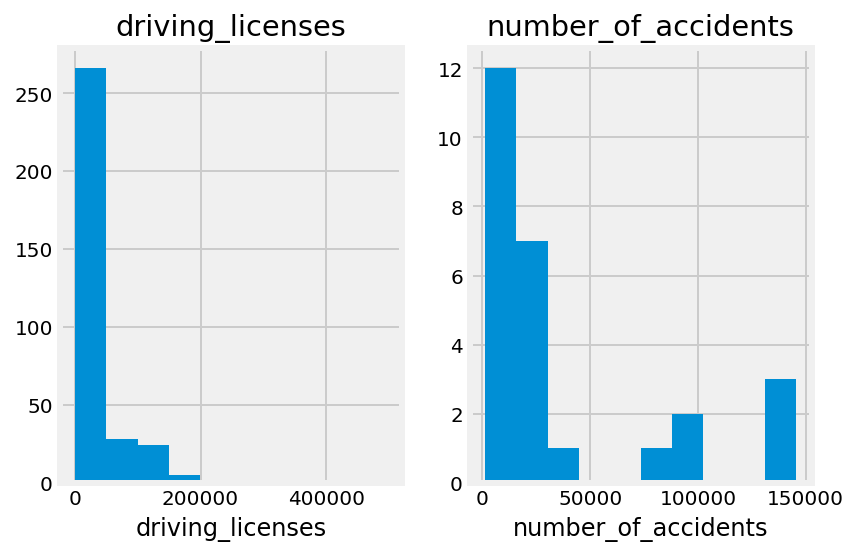

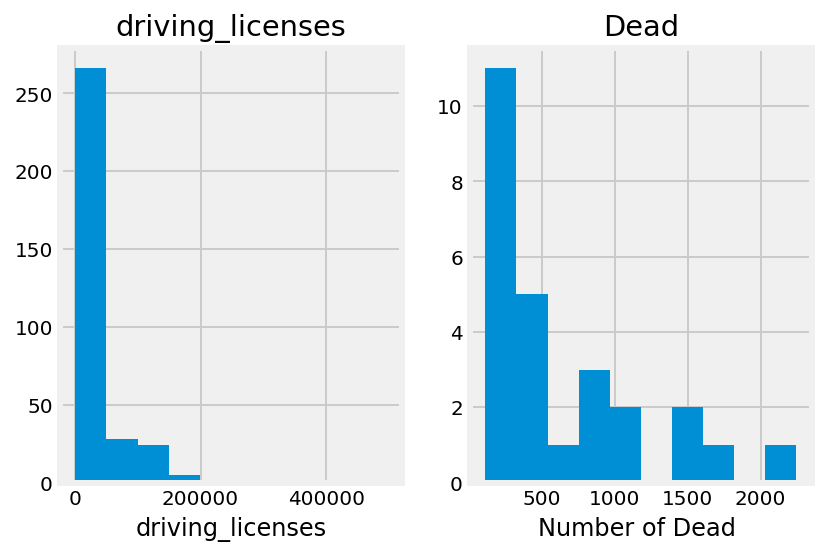

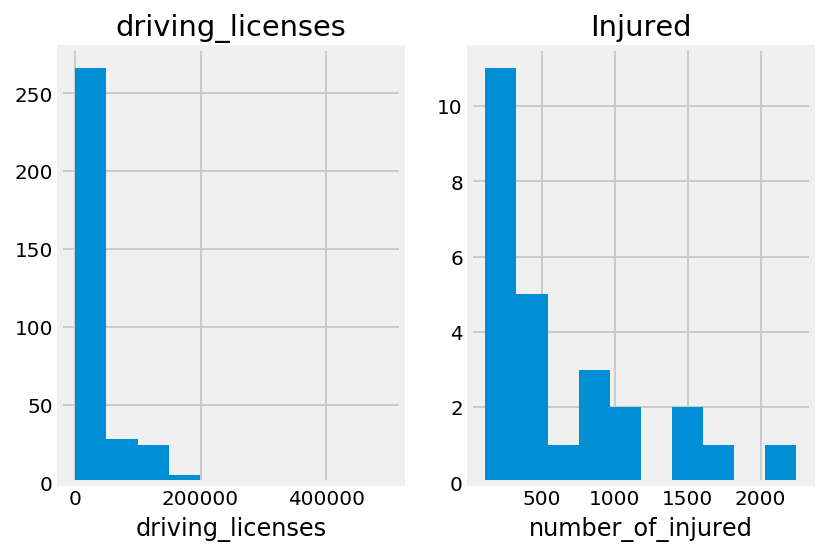

In [87]:

subplot_histograms(combined_df,['driving_licenses','number_of_accidents'],['driving_licenses','number_of_accidents'],['driving_licenses','number_of_accidents'])
subplot_histograms(combined_df,['driving_licenses','number_of_dead'],['driving_licenses','Dead'],['driving_licenses','Number of Dead '])
subplot_histograms(combined_df,['driving_licenses','number_of_dead'],['driving_licenses','Injured'],['driving_licenses','number_of_injured'])

#### Plot and interpret scatter plots

For each of the following:
- Driving Licenses vs. Traffic Accidents for 2017
- Driving Licenses vs. Traffic Accidents for 2016
- Driving Licenses for 2016 vs 2017
- Traffic Accidents for 2016 vs 2017

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [88]:

df2017=combined_df.query('year == [2017] ')

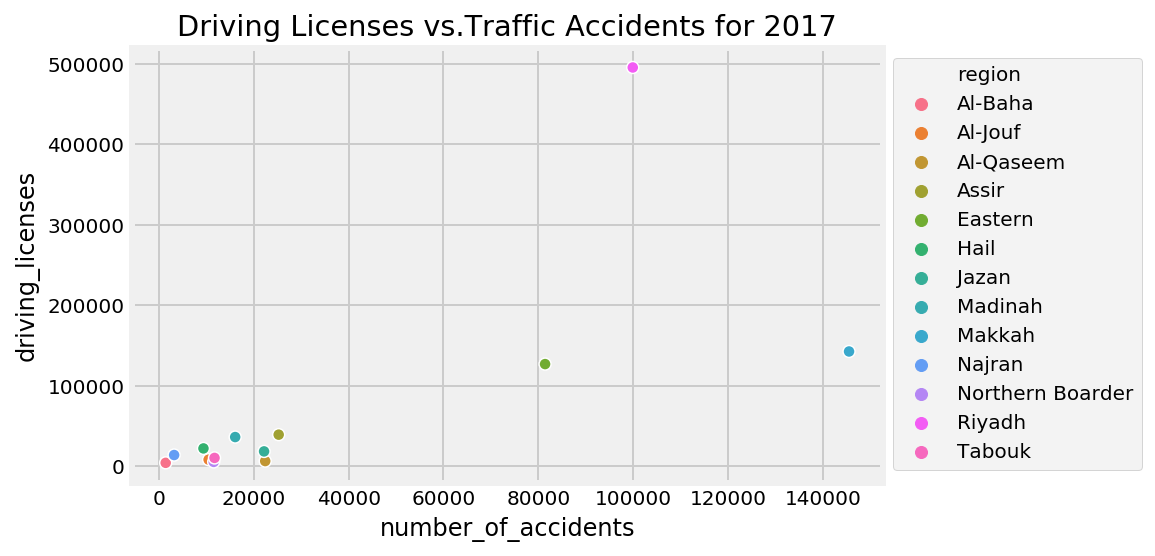

In [89]:
df2017=combined_df.query('year == [2017] ')
## Driving Licenses vs. Traffic Accidents for 2017
Traffic_Accidents=sns.scatterplot(y='driving_licenses', x='number_of_accidents',
                                  data=df2017,hue='region')
Traffic_Accidents=plt.title('Driving Licenses vs.Traffic Accidents for 2017')
plt.legend(bbox_to_anchor=(1,1))


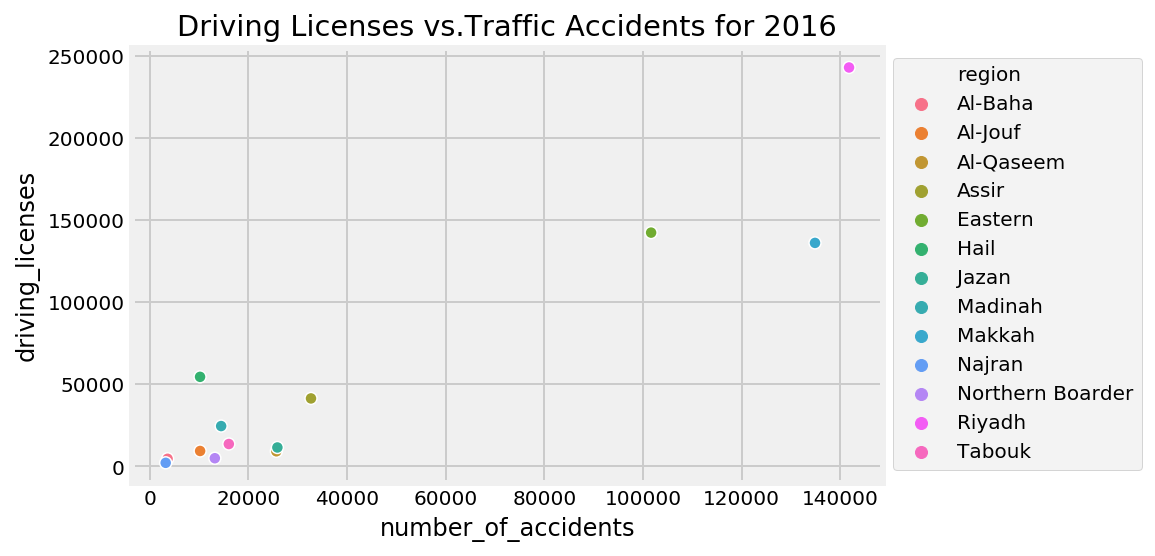

In [90]:
#Driving Licenses vs. Traffic Accidents for 2016
df2016=combined_df.query('year == [2016] ')
Traffic_Accidents=sns.scatterplot(y='driving_licenses', x='number_of_accidents', data=df2016,hue='region')
Traffic_Accidents=plt.title('Driving Licenses vs.Traffic Accidents for 2016')
plt.legend(bbox_to_anchor=(1,1))

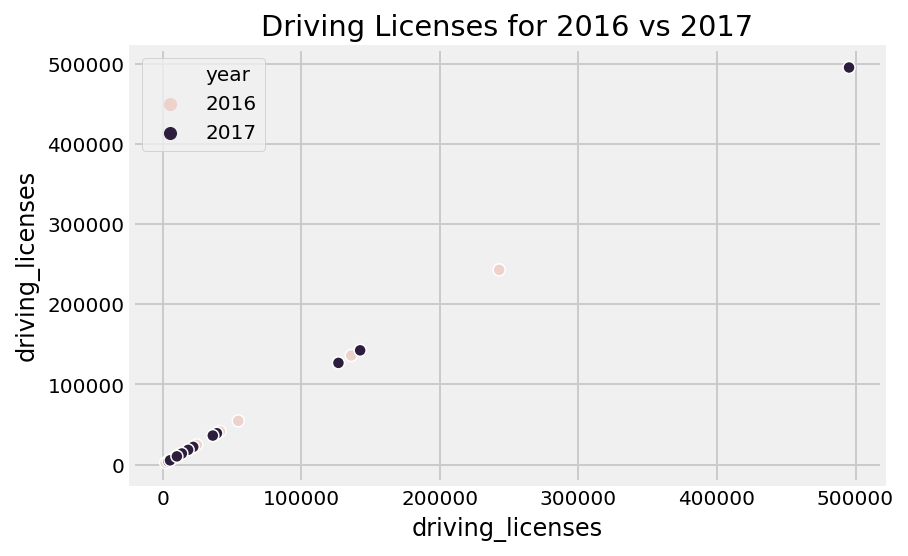

In [91]:
#Driving Licenses for 2016 vs 2017
df2016_2017=combined_df.query('year == [2016,2017] ')
Driving_Licenses=sns.scatterplot(y='driving_licenses', x='driving_licenses', data=df2016_2017,hue='year')
Driving_Licenses=plt.title('Driving Licenses for 2016 vs 2017')

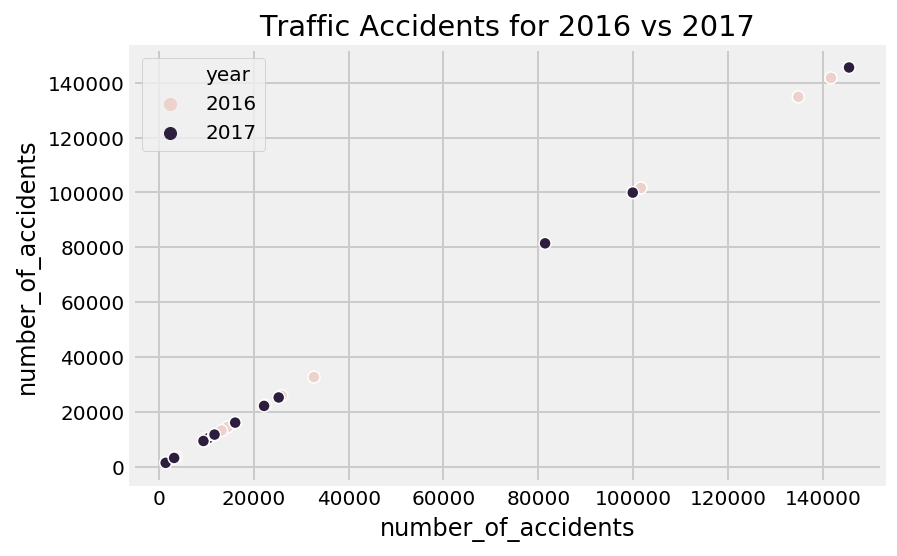

In [92]:
#Traffic Accidents for 2016 vs 2017
Traffic_Accidents=sns.scatterplot(y='number_of_accidents', x='number_of_accidents', 
                                  data=df2016_2017,hue='year')
Traffic_Accidents=plt.title('Traffic Accidents for 2016 vs 2017')

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [93]:
combined_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 8 columns):
year                   325 non-null int64
region                 325 non-null object
number_of_accidents    26 non-null float64
number_of_dead         26 non-null float64
number_of_injured      26 non-null float64
driving_licenses       325 non-null int64
x                      325 non-null float64
y                      325 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 20.4+ KB


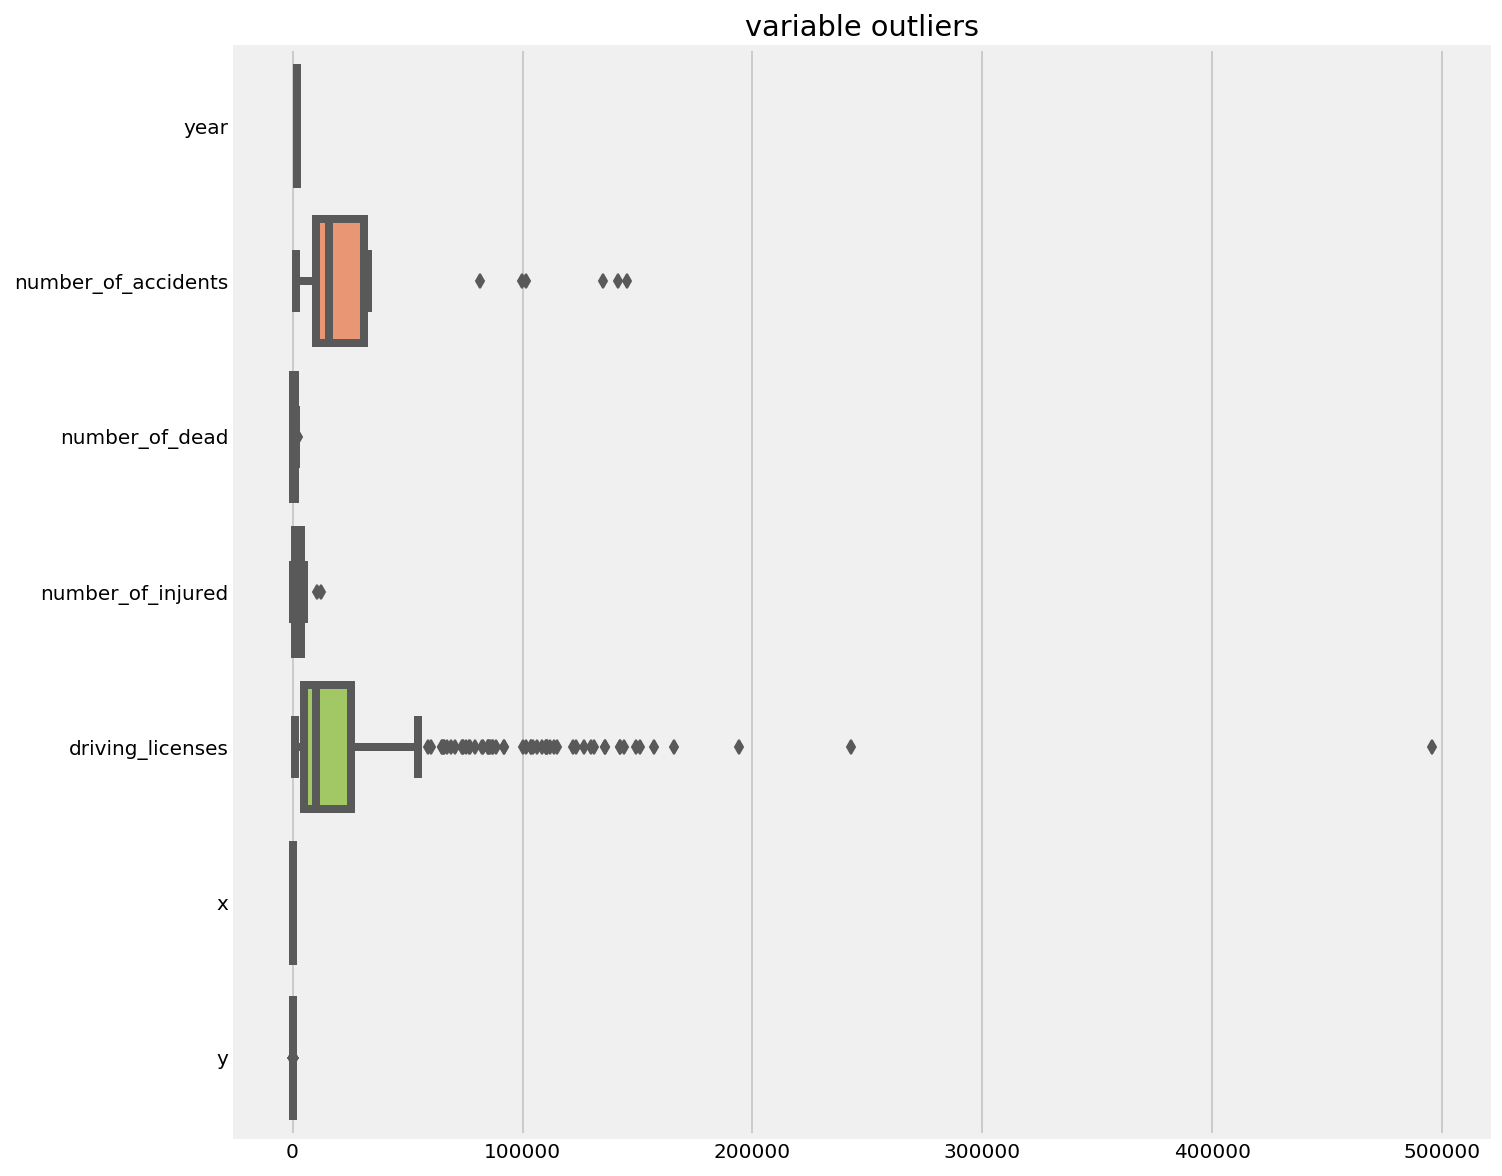

In [94]:
# Code
ax=plt.figure(figsize=(10,10))
ax= sns.boxplot(data=combined_df, orient="h", palette="Set2")
ax=plt.title('variable outliers')

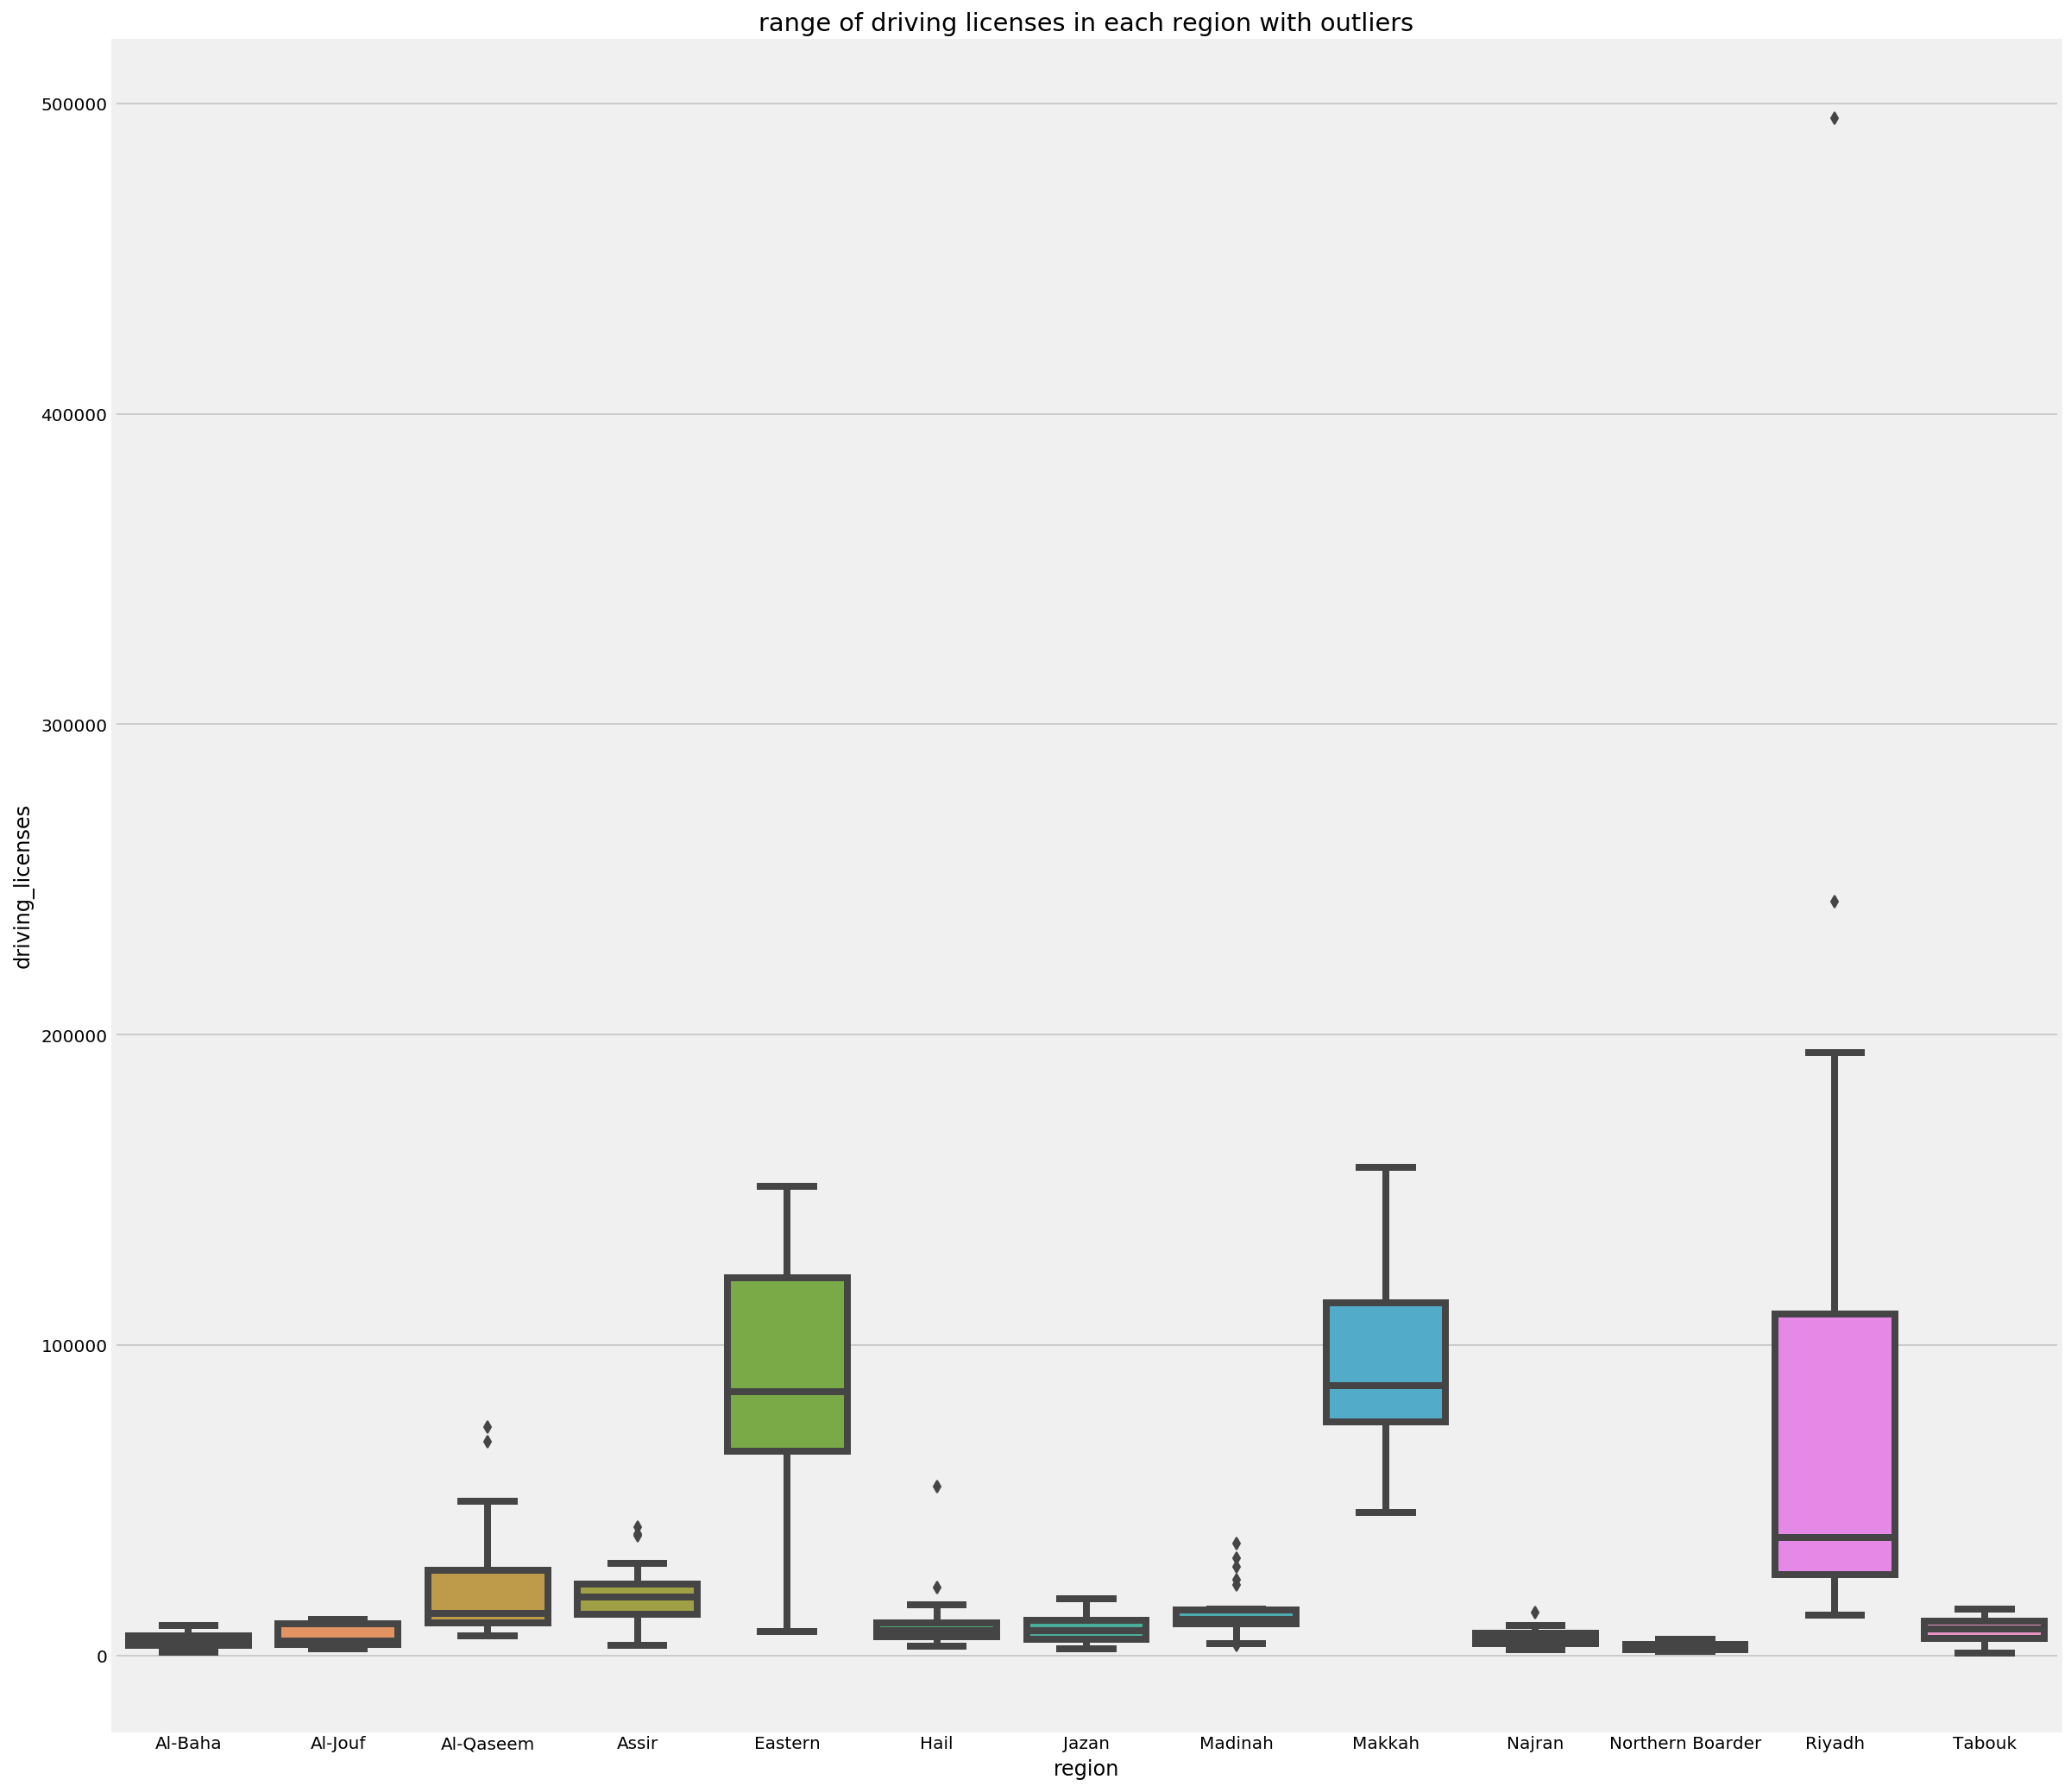

In [95]:
ax=plt.figure(figsize=(18,18))
ax = sns.boxplot(y='driving_licenses',x='region' ,data=combined_df)
ax=plt.title('range of driving licenses in each region with outliers')

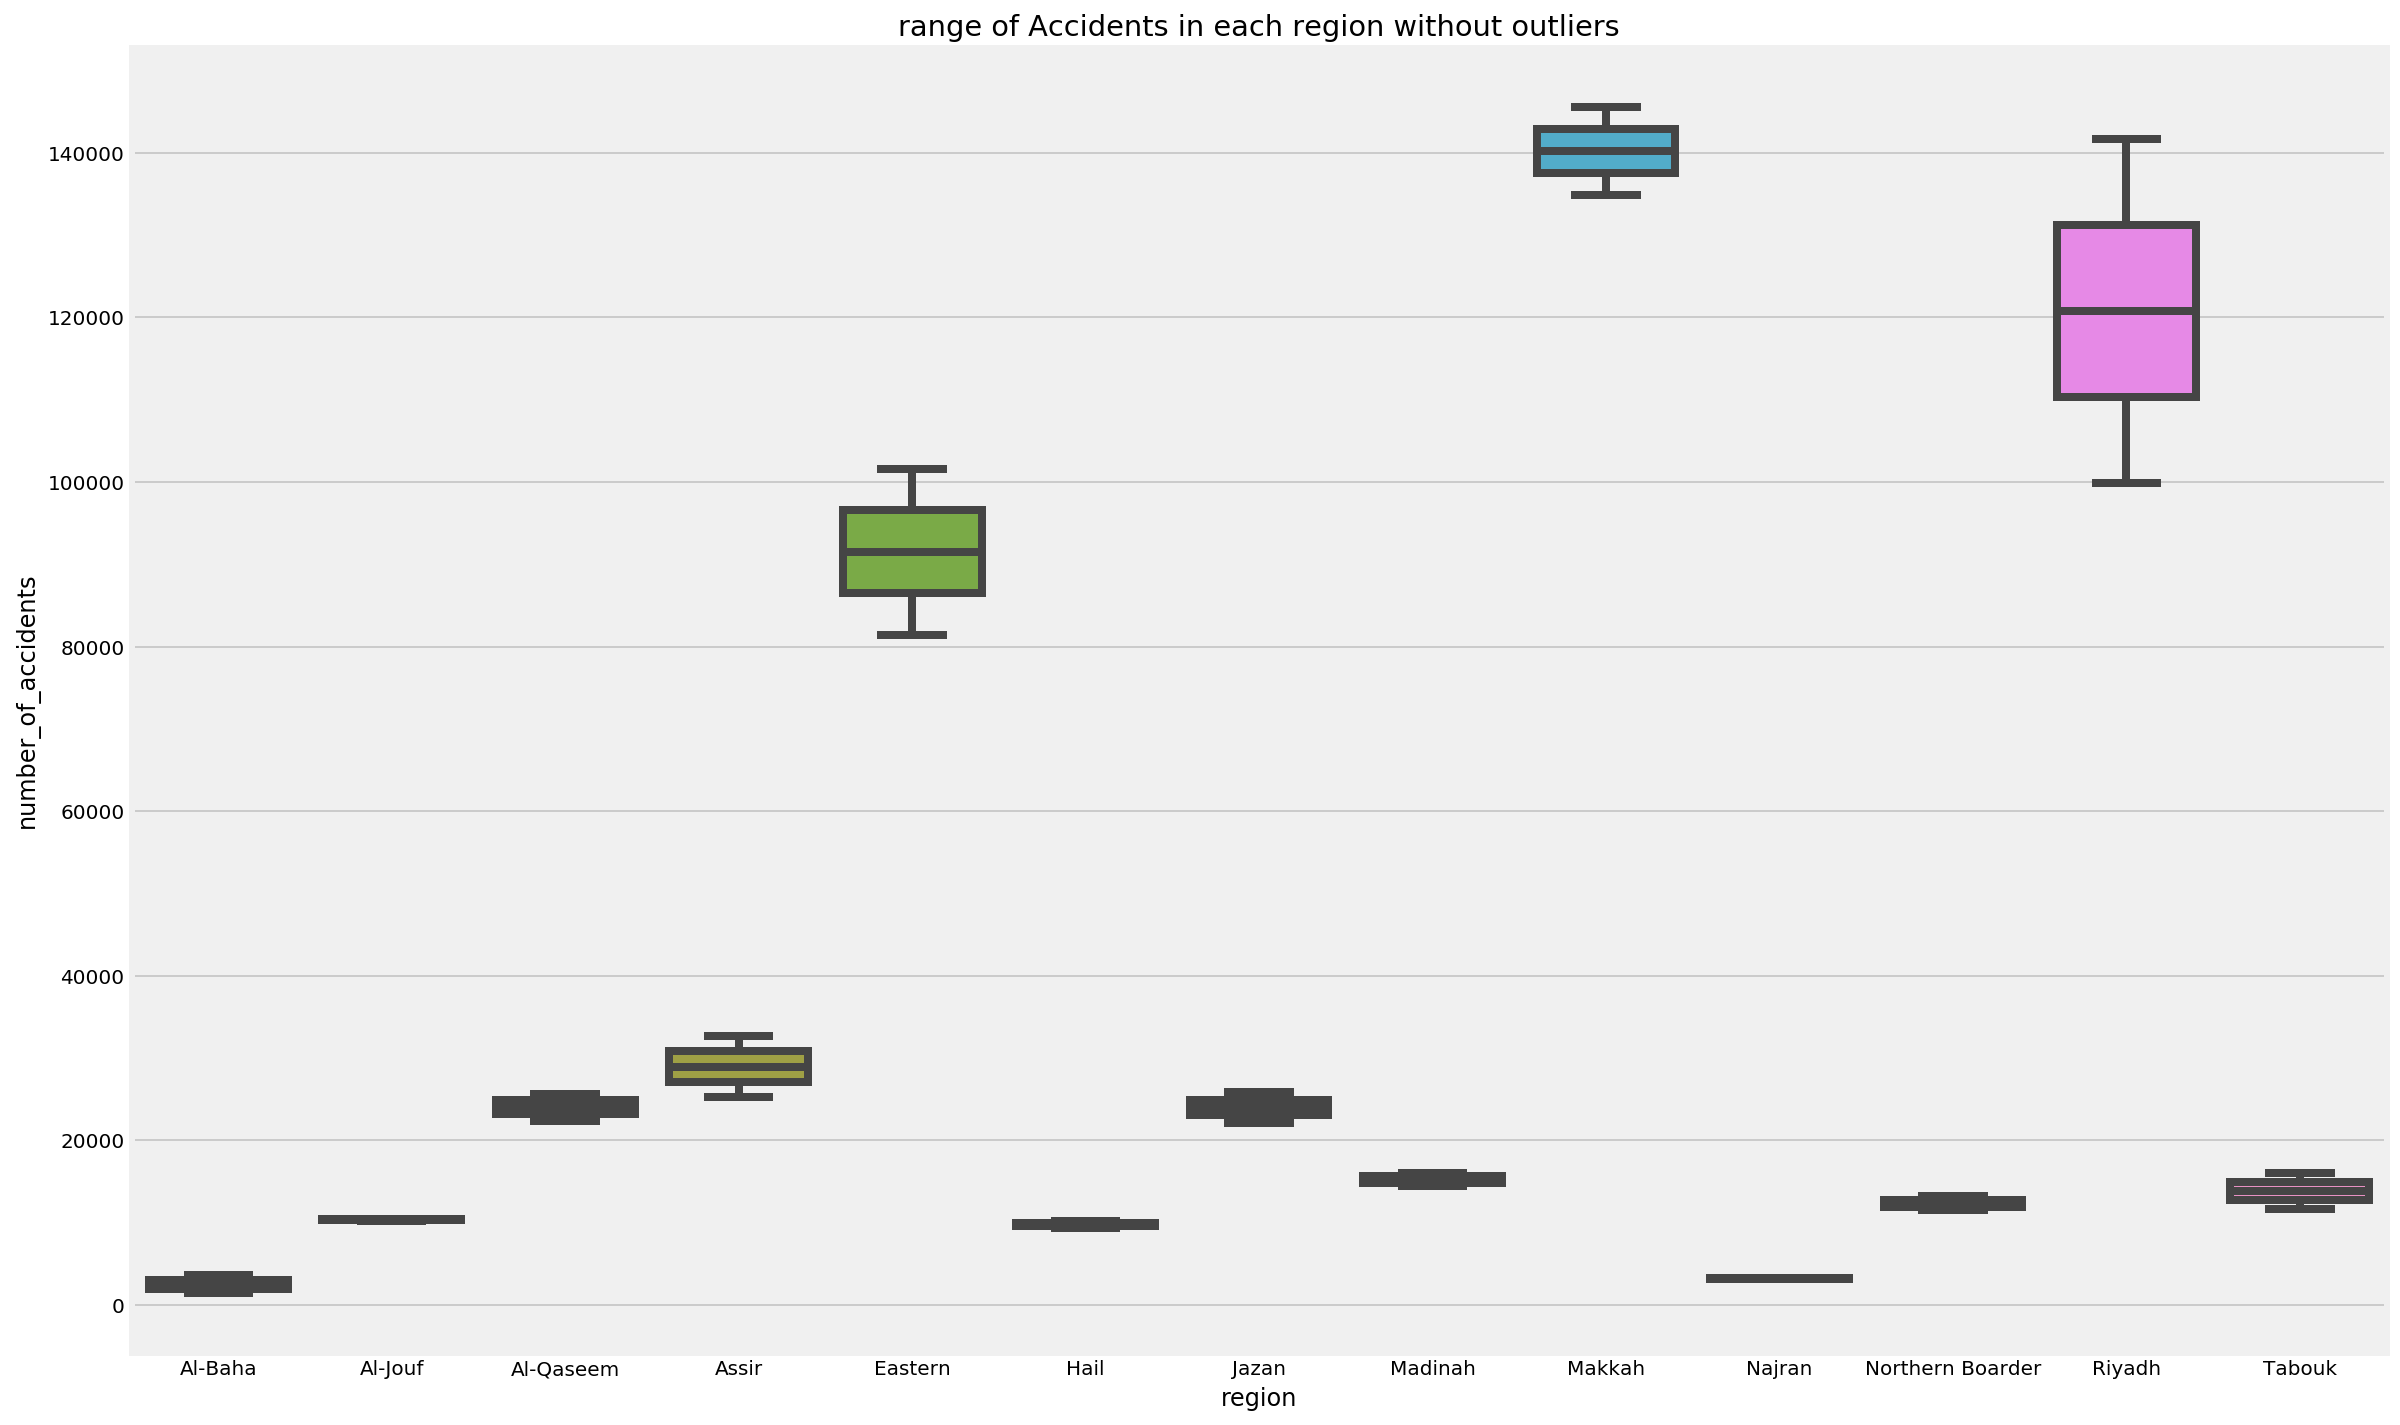

In [96]:
ax=plt.figure(figsize=(18,12))
ax = sns.boxplot(y='number_of_accidents',x='region' ,data=combined_df)
ax=plt.title('range of Accidents in each region without outliers')


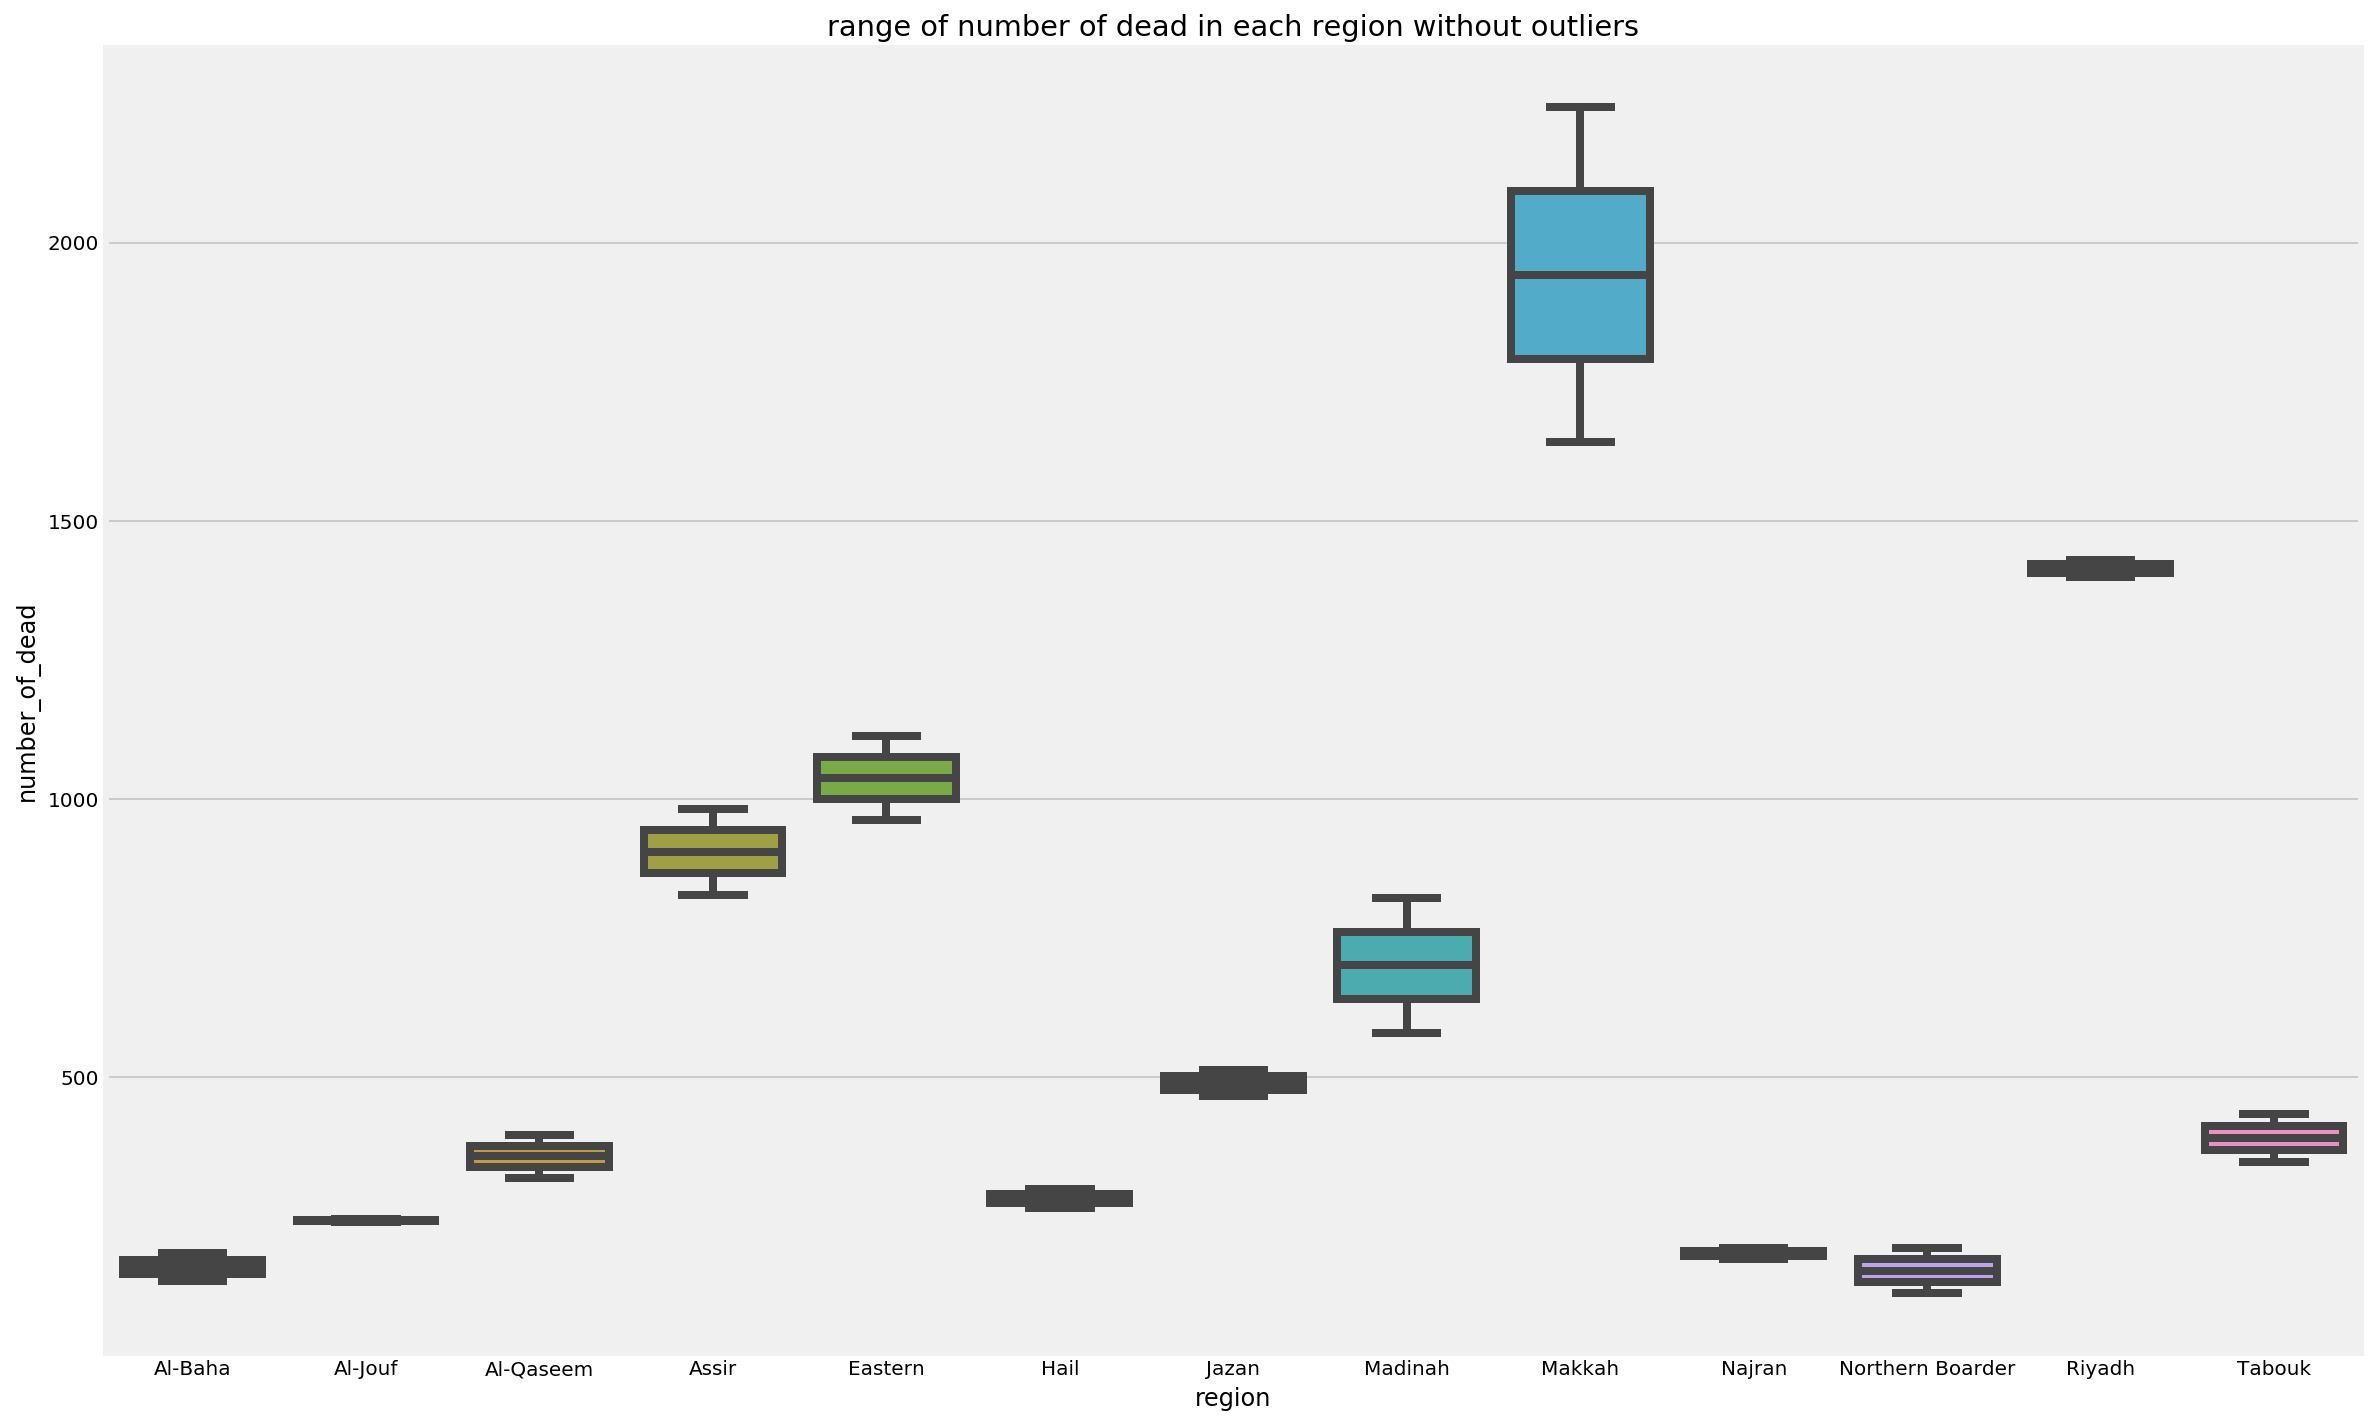

In [97]:
ax=plt.figure(figsize=(18,12))
ax = sns.boxplot(y='number_of_dead',x='region' ,data=combined_df)
ax=plt.title('range of number of dead in each region without outliers')

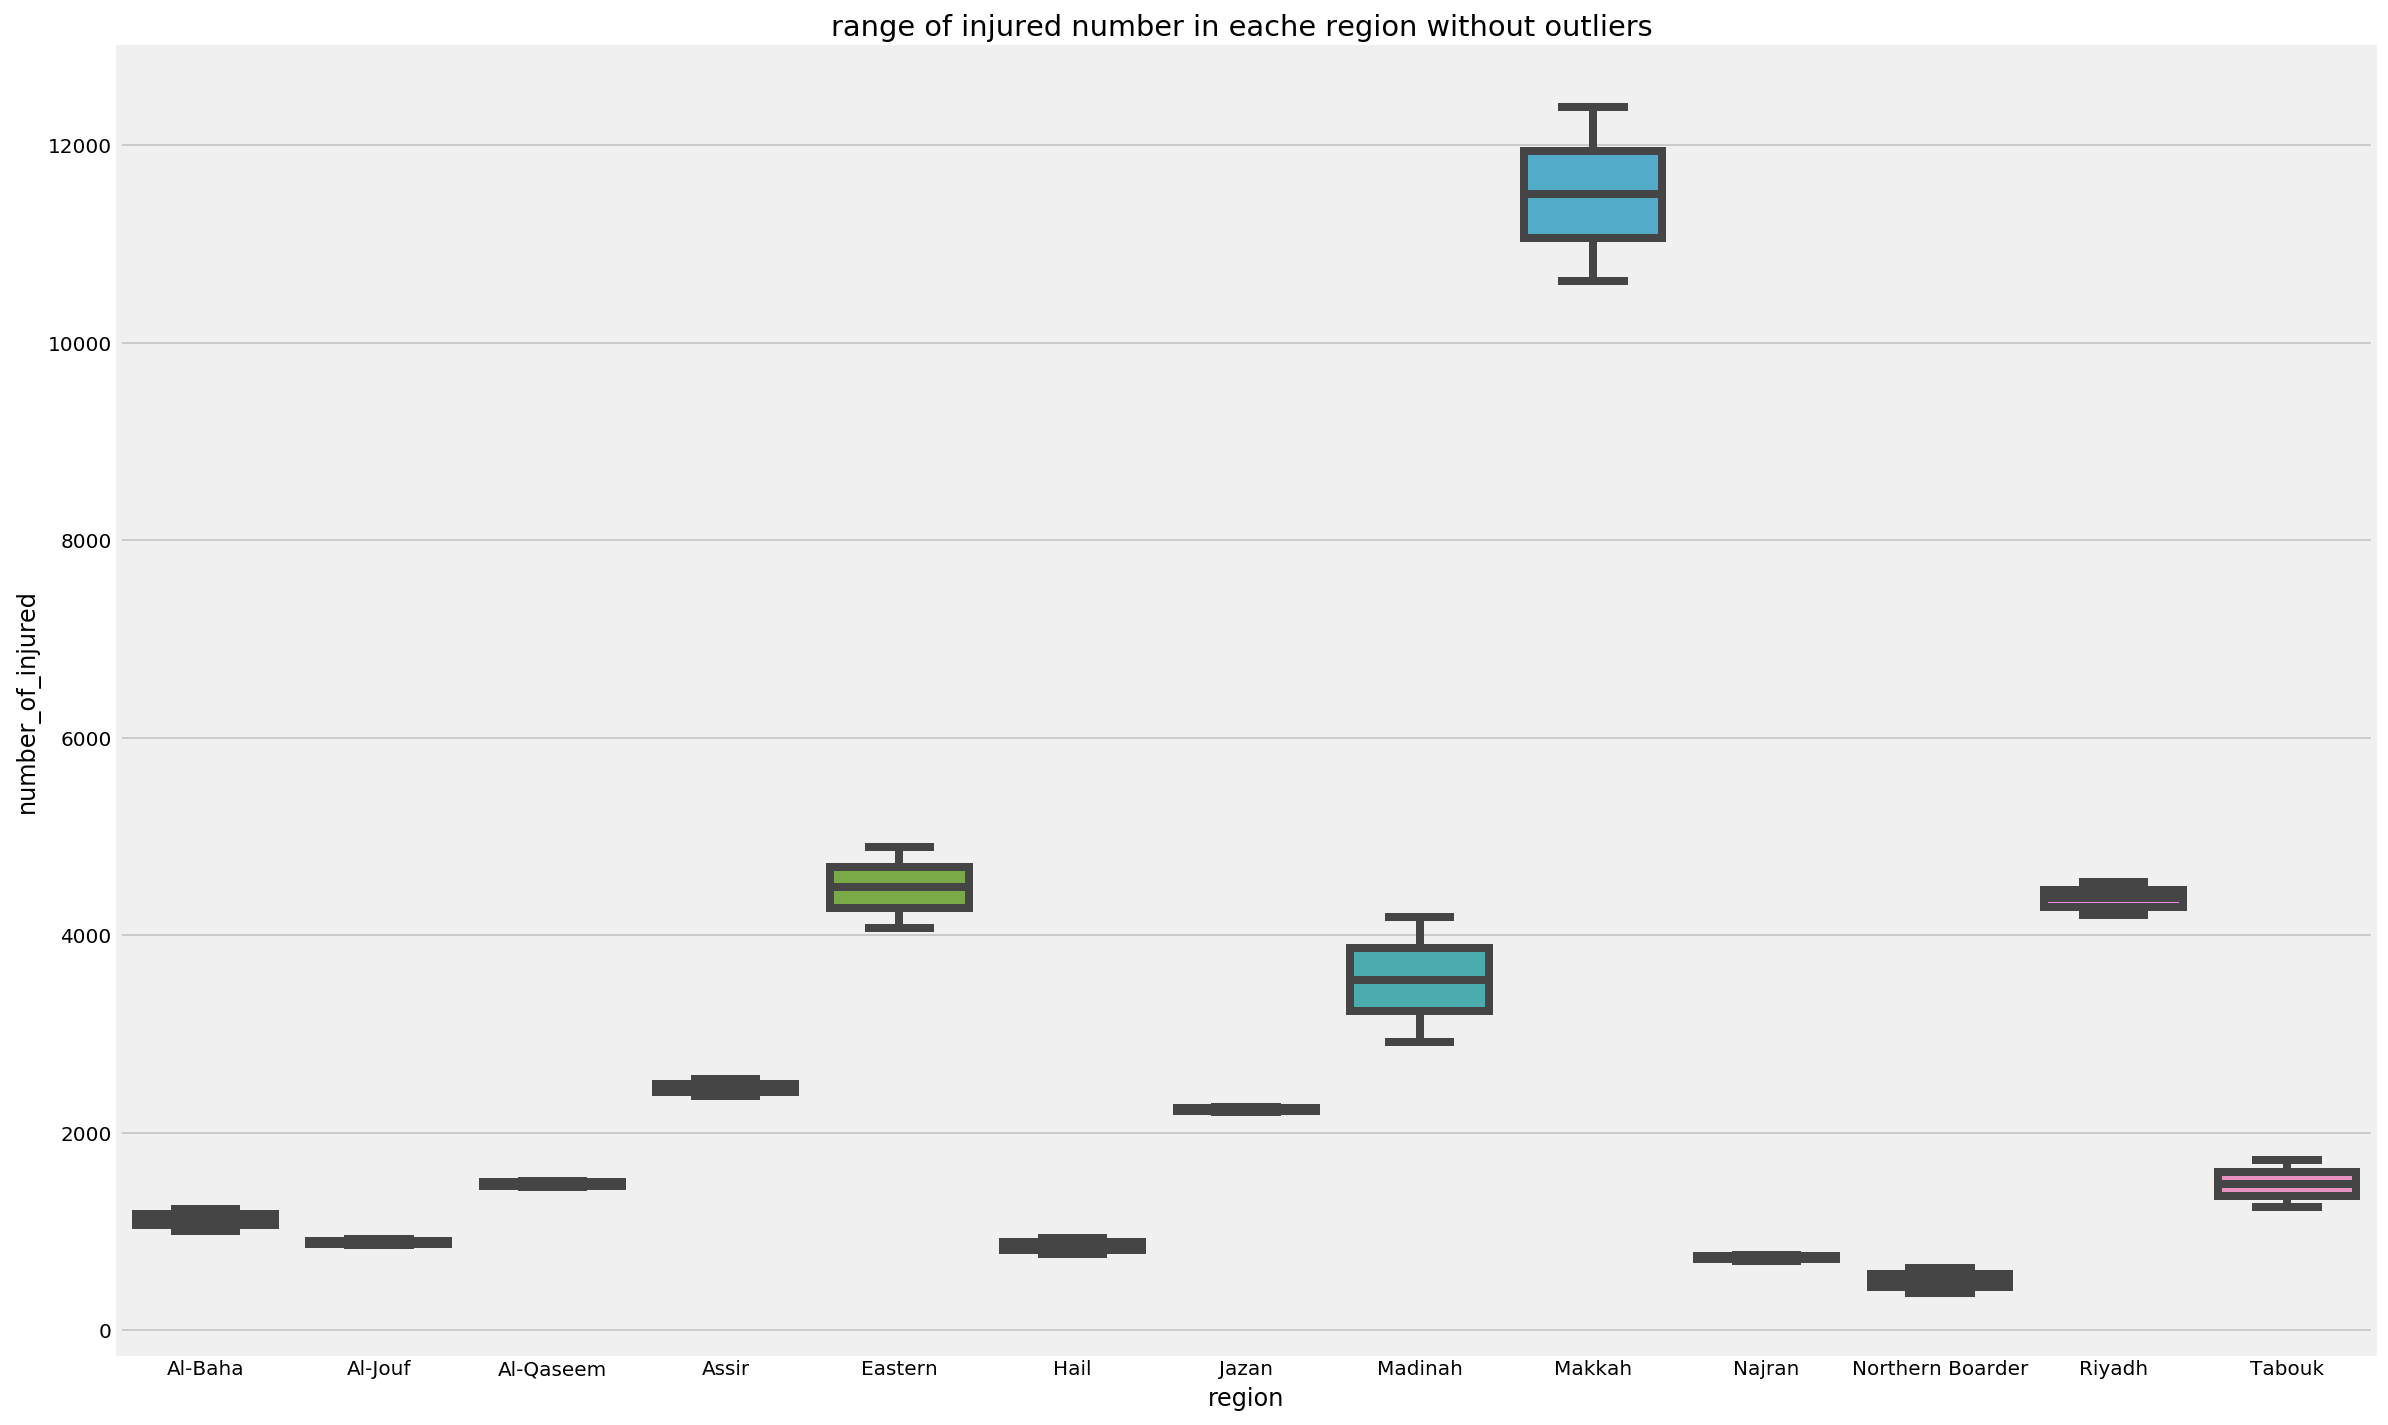

In [98]:
ax=plt.figure(figsize=(18,12))
ax = sns.boxplot(y='number_of_injured',x='region' ,data=combined_df)
ax=plt.title('range of injured number in eache region without outliers ')


#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Text(0.5, 1.0, 'Number of Driving Licenses in region')

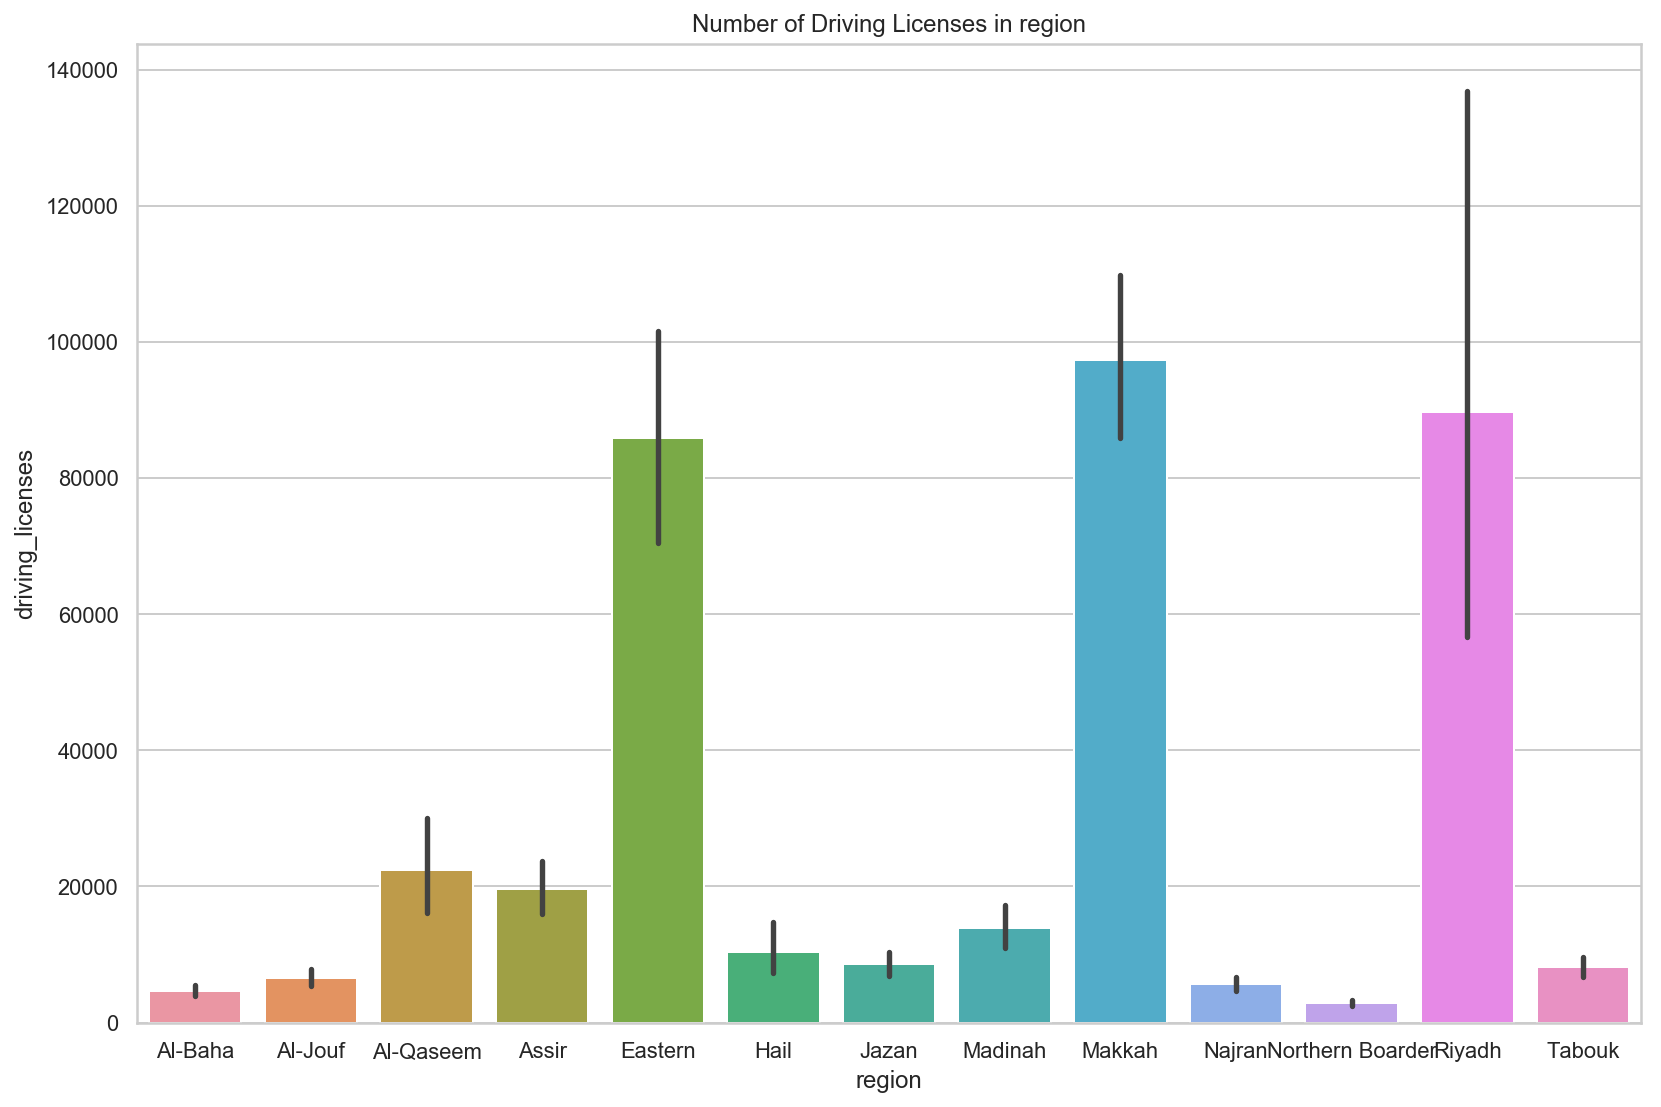

In [99]:
sns.set(style="whitegrid")
ax=plt.figure(figsize=(12,9))
ax = sns.barplot(x="region", y="driving_licenses", data=combined_df)
plt.title('Number of Driving Licenses in region')

Text(0.5, 1.0, 'Number of Accidents in region')

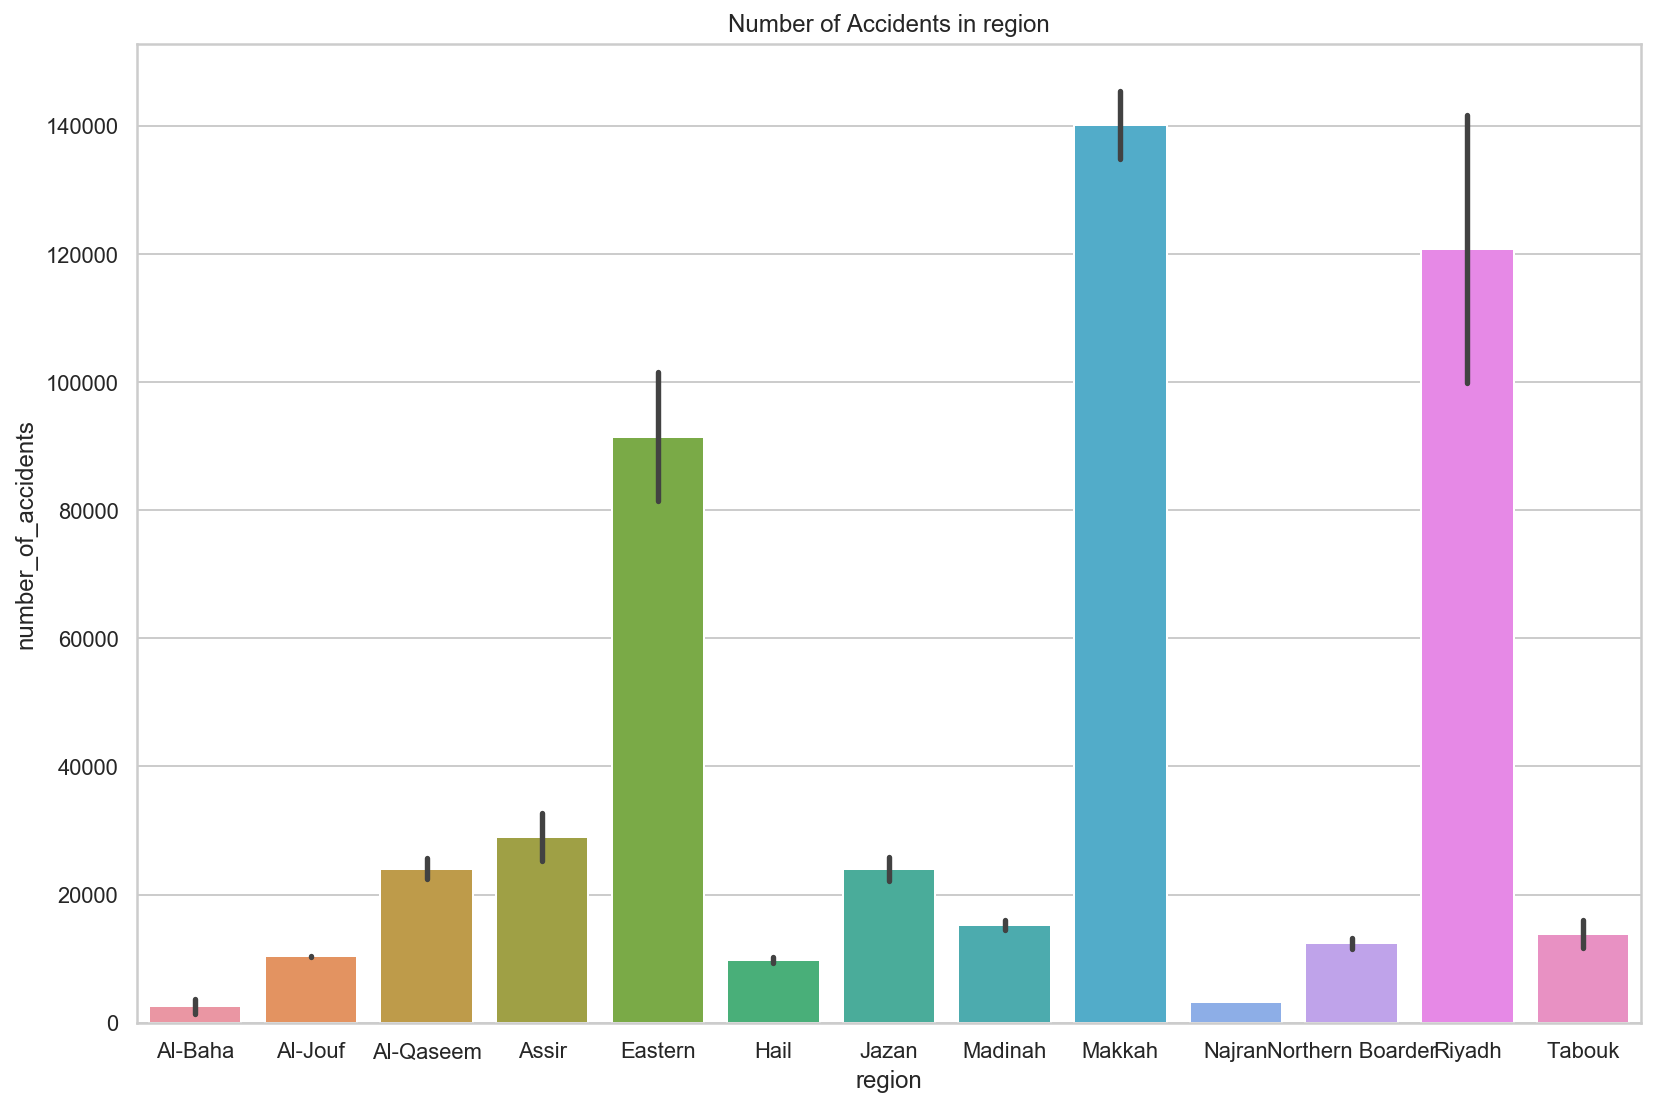

In [108]:
sns.set(style="whitegrid")
ax=plt.figure(figsize=(12,9))
ax = sns.barplot(x="region", y='number_of_accidents', data=combined_df)
plt.title('Number of Accidents in region')

Text(0.5, 1.0, 'Number of Dead in region by Traffic Accidents')

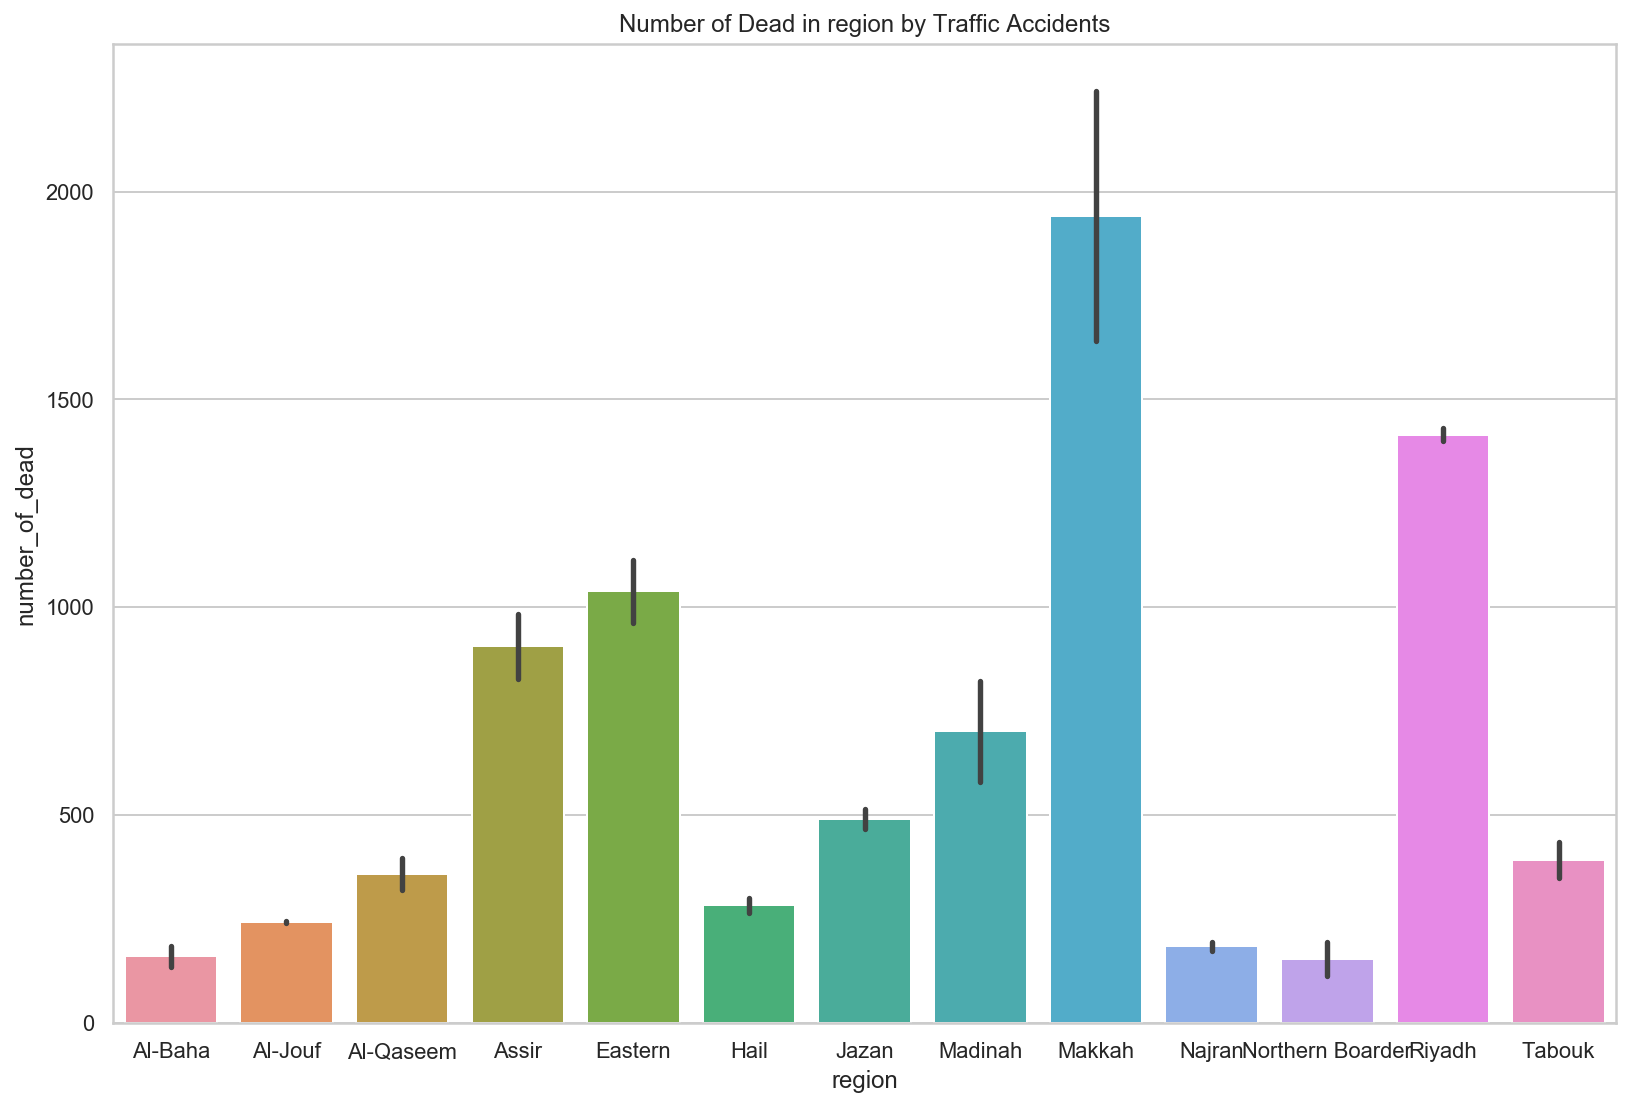

In [101]:
sns.set(style="whitegrid")
ax=plt.figure(figsize=(12,9))
ax = sns.barplot(x="region", y='number_of_dead', data=combined_df)
plt.title('Number of Dead in region by Traffic Accidents')

Text(0.5, 1.0, 'Number of injured region by Traffic Accidents')

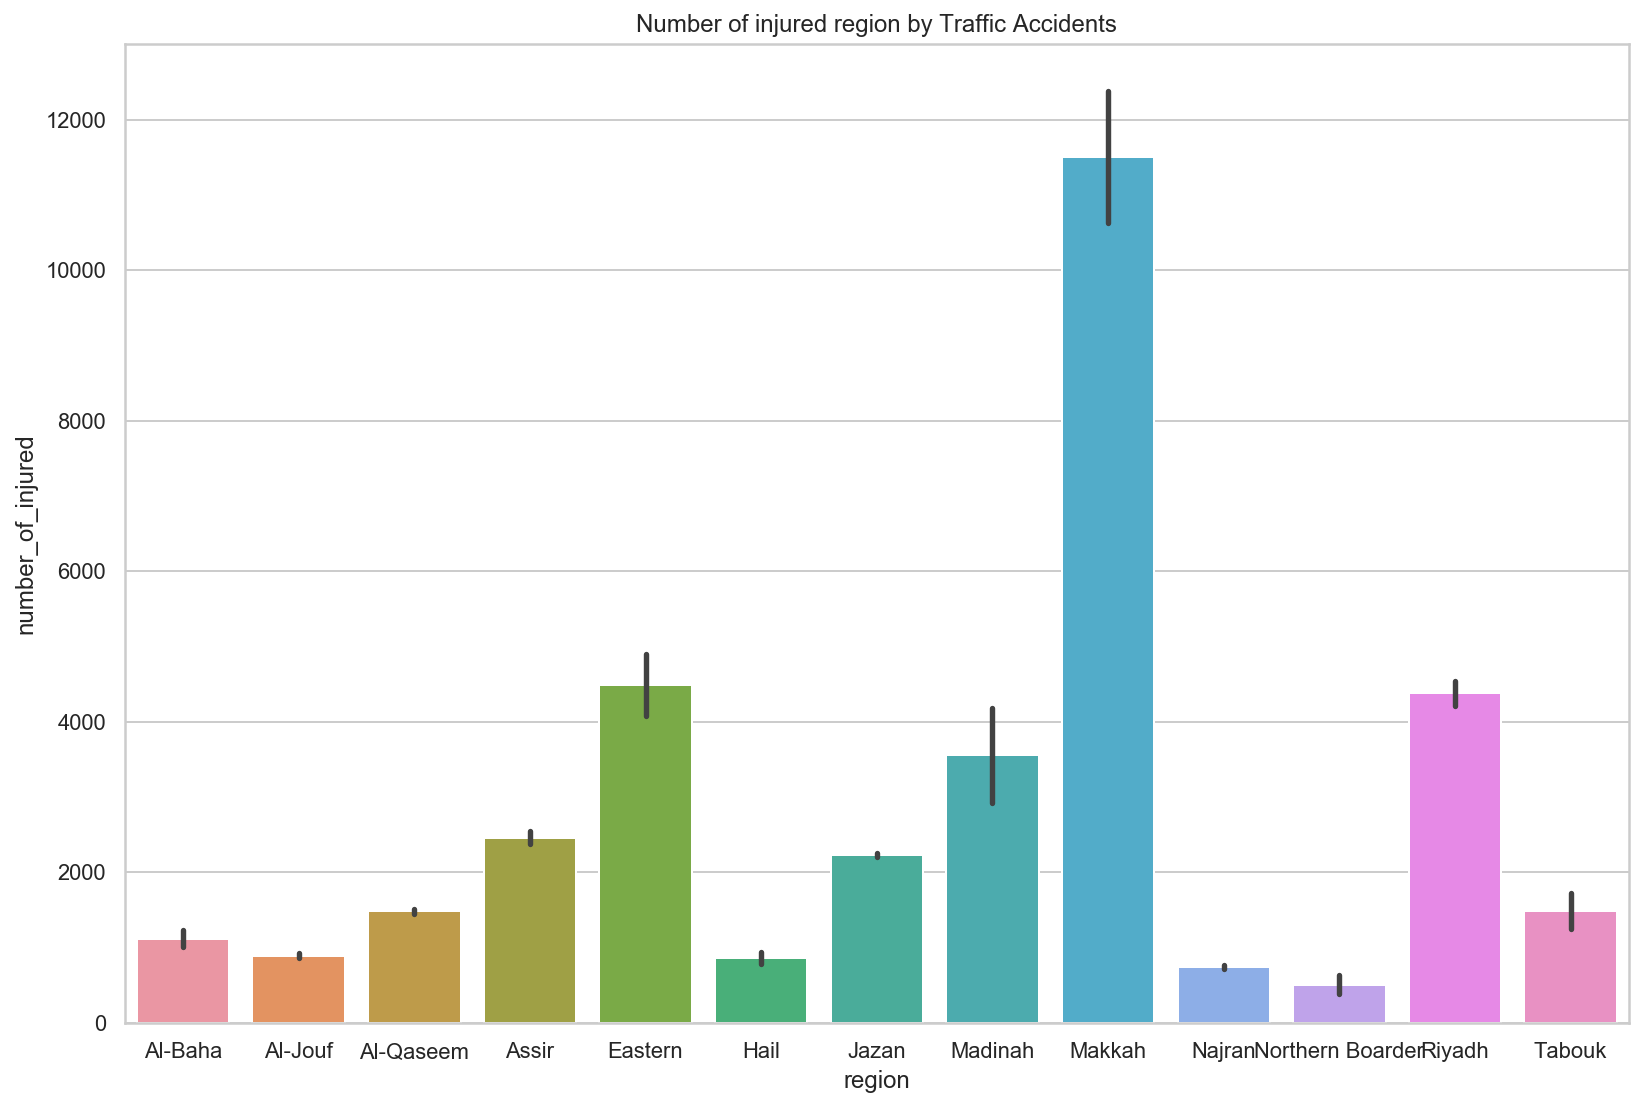

In [102]:
sns.set(style="whitegrid")
ax=plt.figure(figsize=(12,9))
ax = sns.barplot(x="region", y='number_of_injured', data=combined_df)
plt.title('Number of injured region by Traffic Accidents')

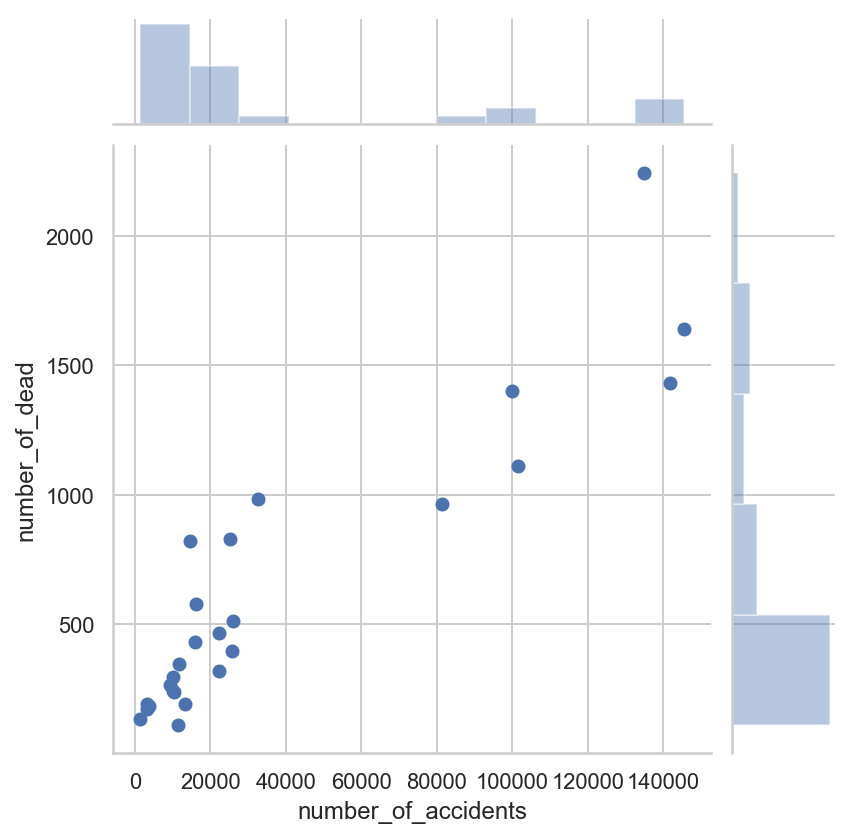

In [103]:
#number of accidents Vs number of dead 
ax=sns.jointplot('number_of_accidents','number_of_dead',data=combined_df);
 


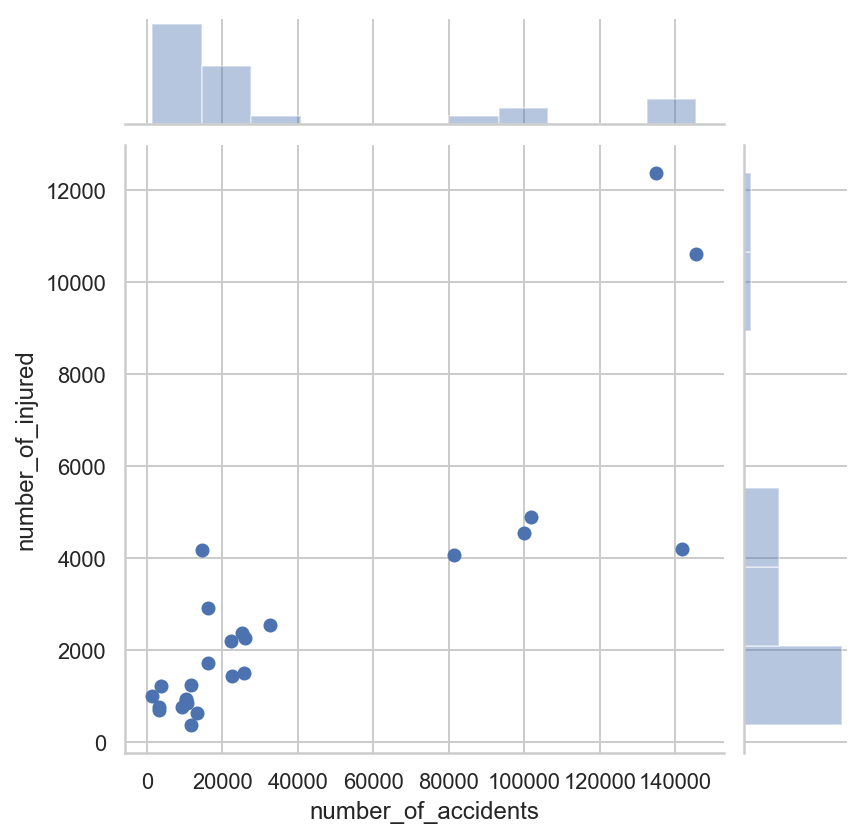

In [104]:
#number of accidents Vs number of injured 
ax=sns.jointplot('number_of_accidents','number_of_injured',data=combined_df)

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

In [105]:
#measures of central tendency, spread, and shape/skewness provide a quick summary of distributions

mean= combined_df['number_of_accidents'].mean()
median= combined_df['number_of_accidents'].median()
mode=stats.mode(combined_df["year"],axis=None) 

print('cuold outliers affect of results, the median less than they affect the mean.When you have unusual values.')    
print('this is average accidents in regions:', mean)
print('this is a middle number of accidents in regions:', median)
print('this is a most frequncy of accidents in year:', mode)
#this is shows how scattered the values are and how much they differ from the mean value.
spread=combined_df['number_of_accidents'].describe()
print('\n', spread,'\n\n')
#I can see how data spreaded by calculait the range.
#*its the difference between the smallest value and the largest value in a dataset*.
#A large range value indicates greater dispersion in the data.
print('so here I can see I have highe spreted data ',
      combined_df['number_of_accidents'].max()-combined_df['number_of_accidents'].min())
#skewenss: its have Right skewenss so that mains 
#many accidents in a region make relatively little, while increasingly few region make very high accidents.cuold be Poor fit and I need more data.

cuold outliers affect of results, the median less than they affect the mean.When you have unusual values.
this is average accidents in regions: 38225.692307692305
this is a middle number of accidents in regions: 16050.5
this is a most frequncy of accidents in year: ModeResult(mode=array([1993], dtype=int64), count=array([13]))

 count        26.000000
mean      38225.692308
std       46493.705035
min        1414.000000
25%       10276.250000
50%       16050.500000
75%       30981.250000
max      145541.000000
Name: number_of_accidents, dtype: float64 


so here I can see I have highe spreted data  144127.0


In [106]:

mean= combined_df['driving_licenses'].mean()
median= combined_df['driving_licenses'].median()
mode=stats.mode(combined_df['year'],axis=None) 

print('cuold outliers affect of results, the median less than they affect the mean.When you have unusual values.')    
print('this is average driving liceses in regions:', mean)
print('this is a middle number of driving liceses in regions:', median)
print('this is a most frequncy of driving liceses in regions:', mode)
#this is shows how scattered the values are and how much they differ from the mean value.
spread=combined_df['driving_licenses'].describe()
print('\n', spread,'\n\n')
#I can see how data spreaded by calculait the range.
#*its the difference between the smallest value and the largest value in a dataset*.
#A large range value indicates greater dispersion in the data.
print('so here I can see I have highe spreted data ',combined_df['driving_licenses'].max()-combined_df['driving_licenses'].min())
#skewenss: its have Right skewenss so that mains .
#many driving liceses in a region make relatively little, while increasingly few region make very high driving liceses.cuold be Poor fit and I need more data.

cuold outliers affect of results, the median less than they affect the mean.When you have unusual values.
this is average driving liceses in regions: 28915.347692307692
this is a middle number of driving liceses in regions: 10267.0
this is a most frequncy of driving liceses in regions: ModeResult(mode=array([1993], dtype=int64), count=array([13]))

 count       325.000000
mean      28915.347692
std       47419.058819
min         915.000000
25%        4846.000000
50%       10267.000000
75%       25423.000000
max      495307.000000
Name: driving_licenses, dtype: float64 


so here I can see I have highe spreted data  494392


#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: no we don't have  normally distributed.

Does This Assumption Hold for:
    - Driving Licenses
    - Traffic Accidents
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: driving licenses and traffic accident have write skewenss and could be effect becuese we did not have enguh data. 

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [107]:
#I feel it's not appropriate

## Outside Research

Based upon your observations, choose **three** regions that demonstrate interesting trends in the number of driving licenses and traffic accidents. Spend some time doing outside research on provincial and central policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Answer:

here is some information I gather it from google:

  RIYADH: The number of deaths and injuries caused by traffic accidents in Saudi Arabia fell between 2017 and 2018,
the Ministry of the Interior (MoI) said on Monday.At a presentation to the 2019 Traffic Safety Conference in Riyadh, 
the MoI revealed the number of deaths in the Kingdom had dropped from over 7,000 in 2017 to 6,025 in 2018,with traffic-related injuries down almost 10 percent to around 30,000.The MoI has set a target to reduce road-related fatalities to eight per 100,000 as part of the government’s Vision 2030 program.source'https://www.arabnews.com'

   A car accident happens every minute on average in Saudi Arabia, or more than 460,000 crashes per year.source'http://saudigazette.com.sa'
 

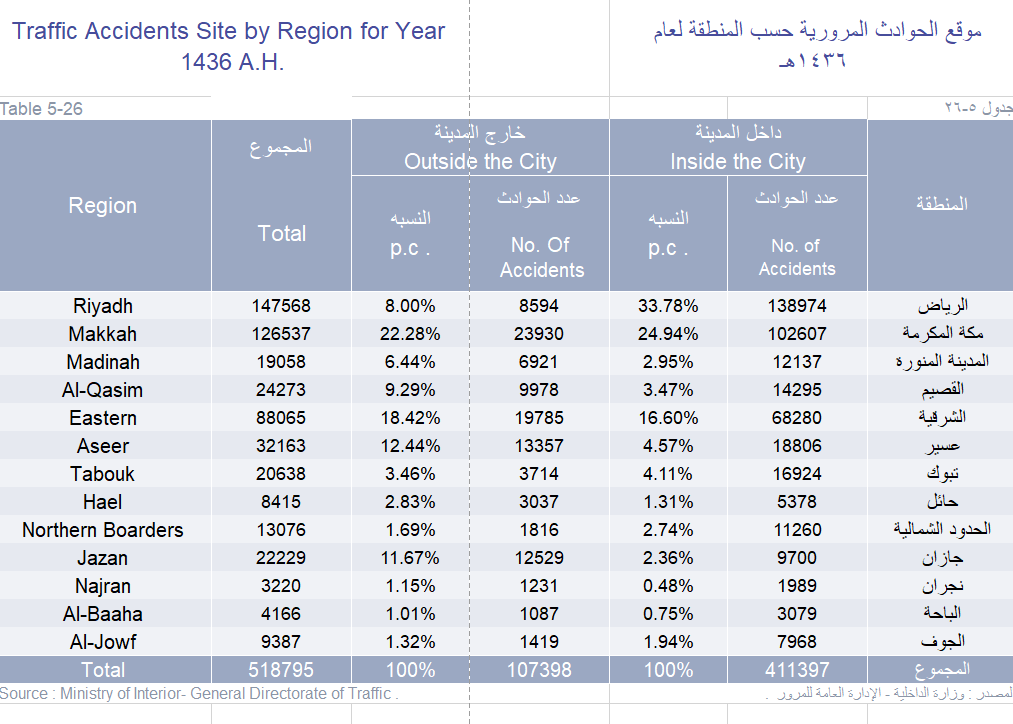





## Conclusions and Recommendations

- Based on your exploration of the data, what are you key takeaways and recommendations?
- Are there additional data you desire that would better inform your investigations?

Answer: 
1-Riyadh,Eastern and Makkah have a most higher number of traffic accidents and driving licesens.
2-Makkah have the most higher number of casualties dead due traffic accidents.
so,Goverment must take action like applay strong test for driviers and don't forget to be carefull and use seat belts.

I would have additional data like day, month and time of traffic accidents to see what date/time have the most.season could be useful as well.

